# Librairie et import de la donnée

In [1]:
# Import des librairies

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# On règle les paramètres de pandas et de la visualisation

sns.set(font_scale = 1.5,rc={'figure.figsize':(60,20)})

pd.options.display.max_columns = 200

pd.options.display.max_rows = 1000

pd.options.display.max_colwidth = 50

In [3]:
chemin = 'Data/fr.openfoodfacts.org.products.csv'

data = pd.read_csv(chemin,sep='\t',low_memory=False)

# Exploration de la donnée

In [4]:
# On examine le dataset

data.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [5]:
# On affiche les information de base sur le dataframe

def information_basique(data): 
    '''
    Affiche le .shape, .info, .describe d'un dataframe 
    Parameters :
    ----------
    data : pd.DataFrame
    Return:
    ------
    '''
    
    print('\033[1m'+'Shape :\n'+'\033[0m',data.shape,'\n')

    print('\033[1m'+'Info :'+'\033[0m')

    data.info()
    
    print('\033[1m'+'\nDescription :')
    
    display(data.describe())

In [6]:
information_basique(data)

Shape :
 (320772, 162) 

Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB

Description :


,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

In [7]:
# On regarde le type des colonnes

data.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

In [8]:
# On fait un plot pour le remplissage des colonnes

def show_missing_data_graph(data):
    '''
    Affiche un graphique du % de remplissage de chaque colonne : 
    Parameters :
    ----------
    data : pd.DataFrame
    Return:
    ------
    '''
    missing_data = round((1 - data.isna().sum()/len(data)),3)
    label = missing_data.index

    sns.barplot(x = label, y = missing_data)
    plt.title('Donnée disponible',fontsize=100)
    plt.xticks(rotation=90)
    plt.tight_layout()

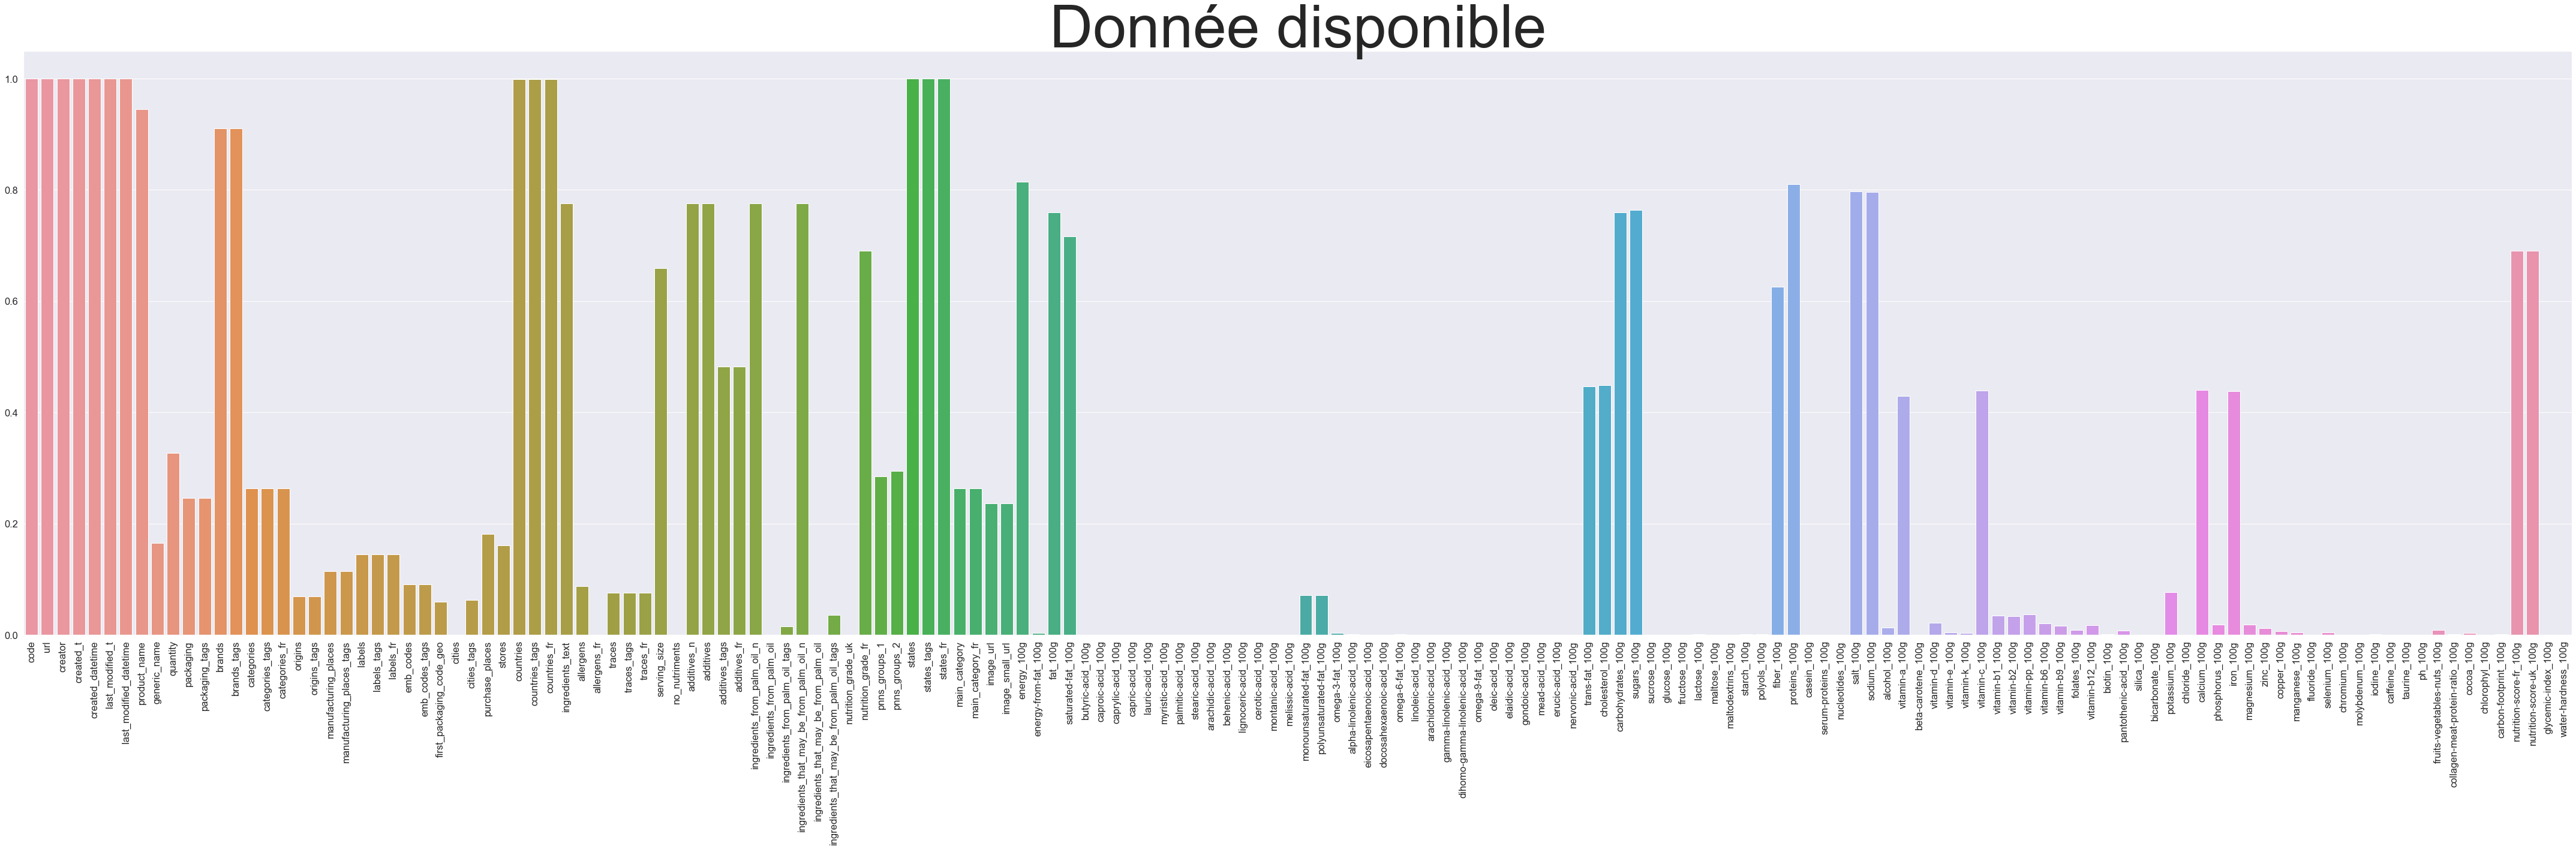

In [9]:
show_missing_data_graph(data)

In [10]:
print(round(data.isna().sum().sort_values(ascending = False)/len(data),3).to_string())

water-hardness_100g                           1.000
no_nutriments                                 1.000
ingredients_that_may_be_from_palm_oil         1.000
nutrition_grade_uk                            1.000
nervonic-acid_100g                            1.000
erucic-acid_100g                              1.000
mead-acid_100g                                1.000
elaidic-acid_100g                             1.000
butyric-acid_100g                             1.000
caproic-acid_100g                             1.000
ingredients_from_palm_oil                     1.000
lignoceric-acid_100g                          1.000
cerotic-acid_100g                             1.000
melissic-acid_100g                            1.000
chlorophyl_100g                               1.000
glycemic-index_100g                           1.000
myristic-acid_100g                            1.000
palmitic-acid_100g                            1.000
caprylic-acid_100g                            1.000
stearic-acid

C:\Users\Louis\AppData\Local\Temp/ipykernel_15176/403495430.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


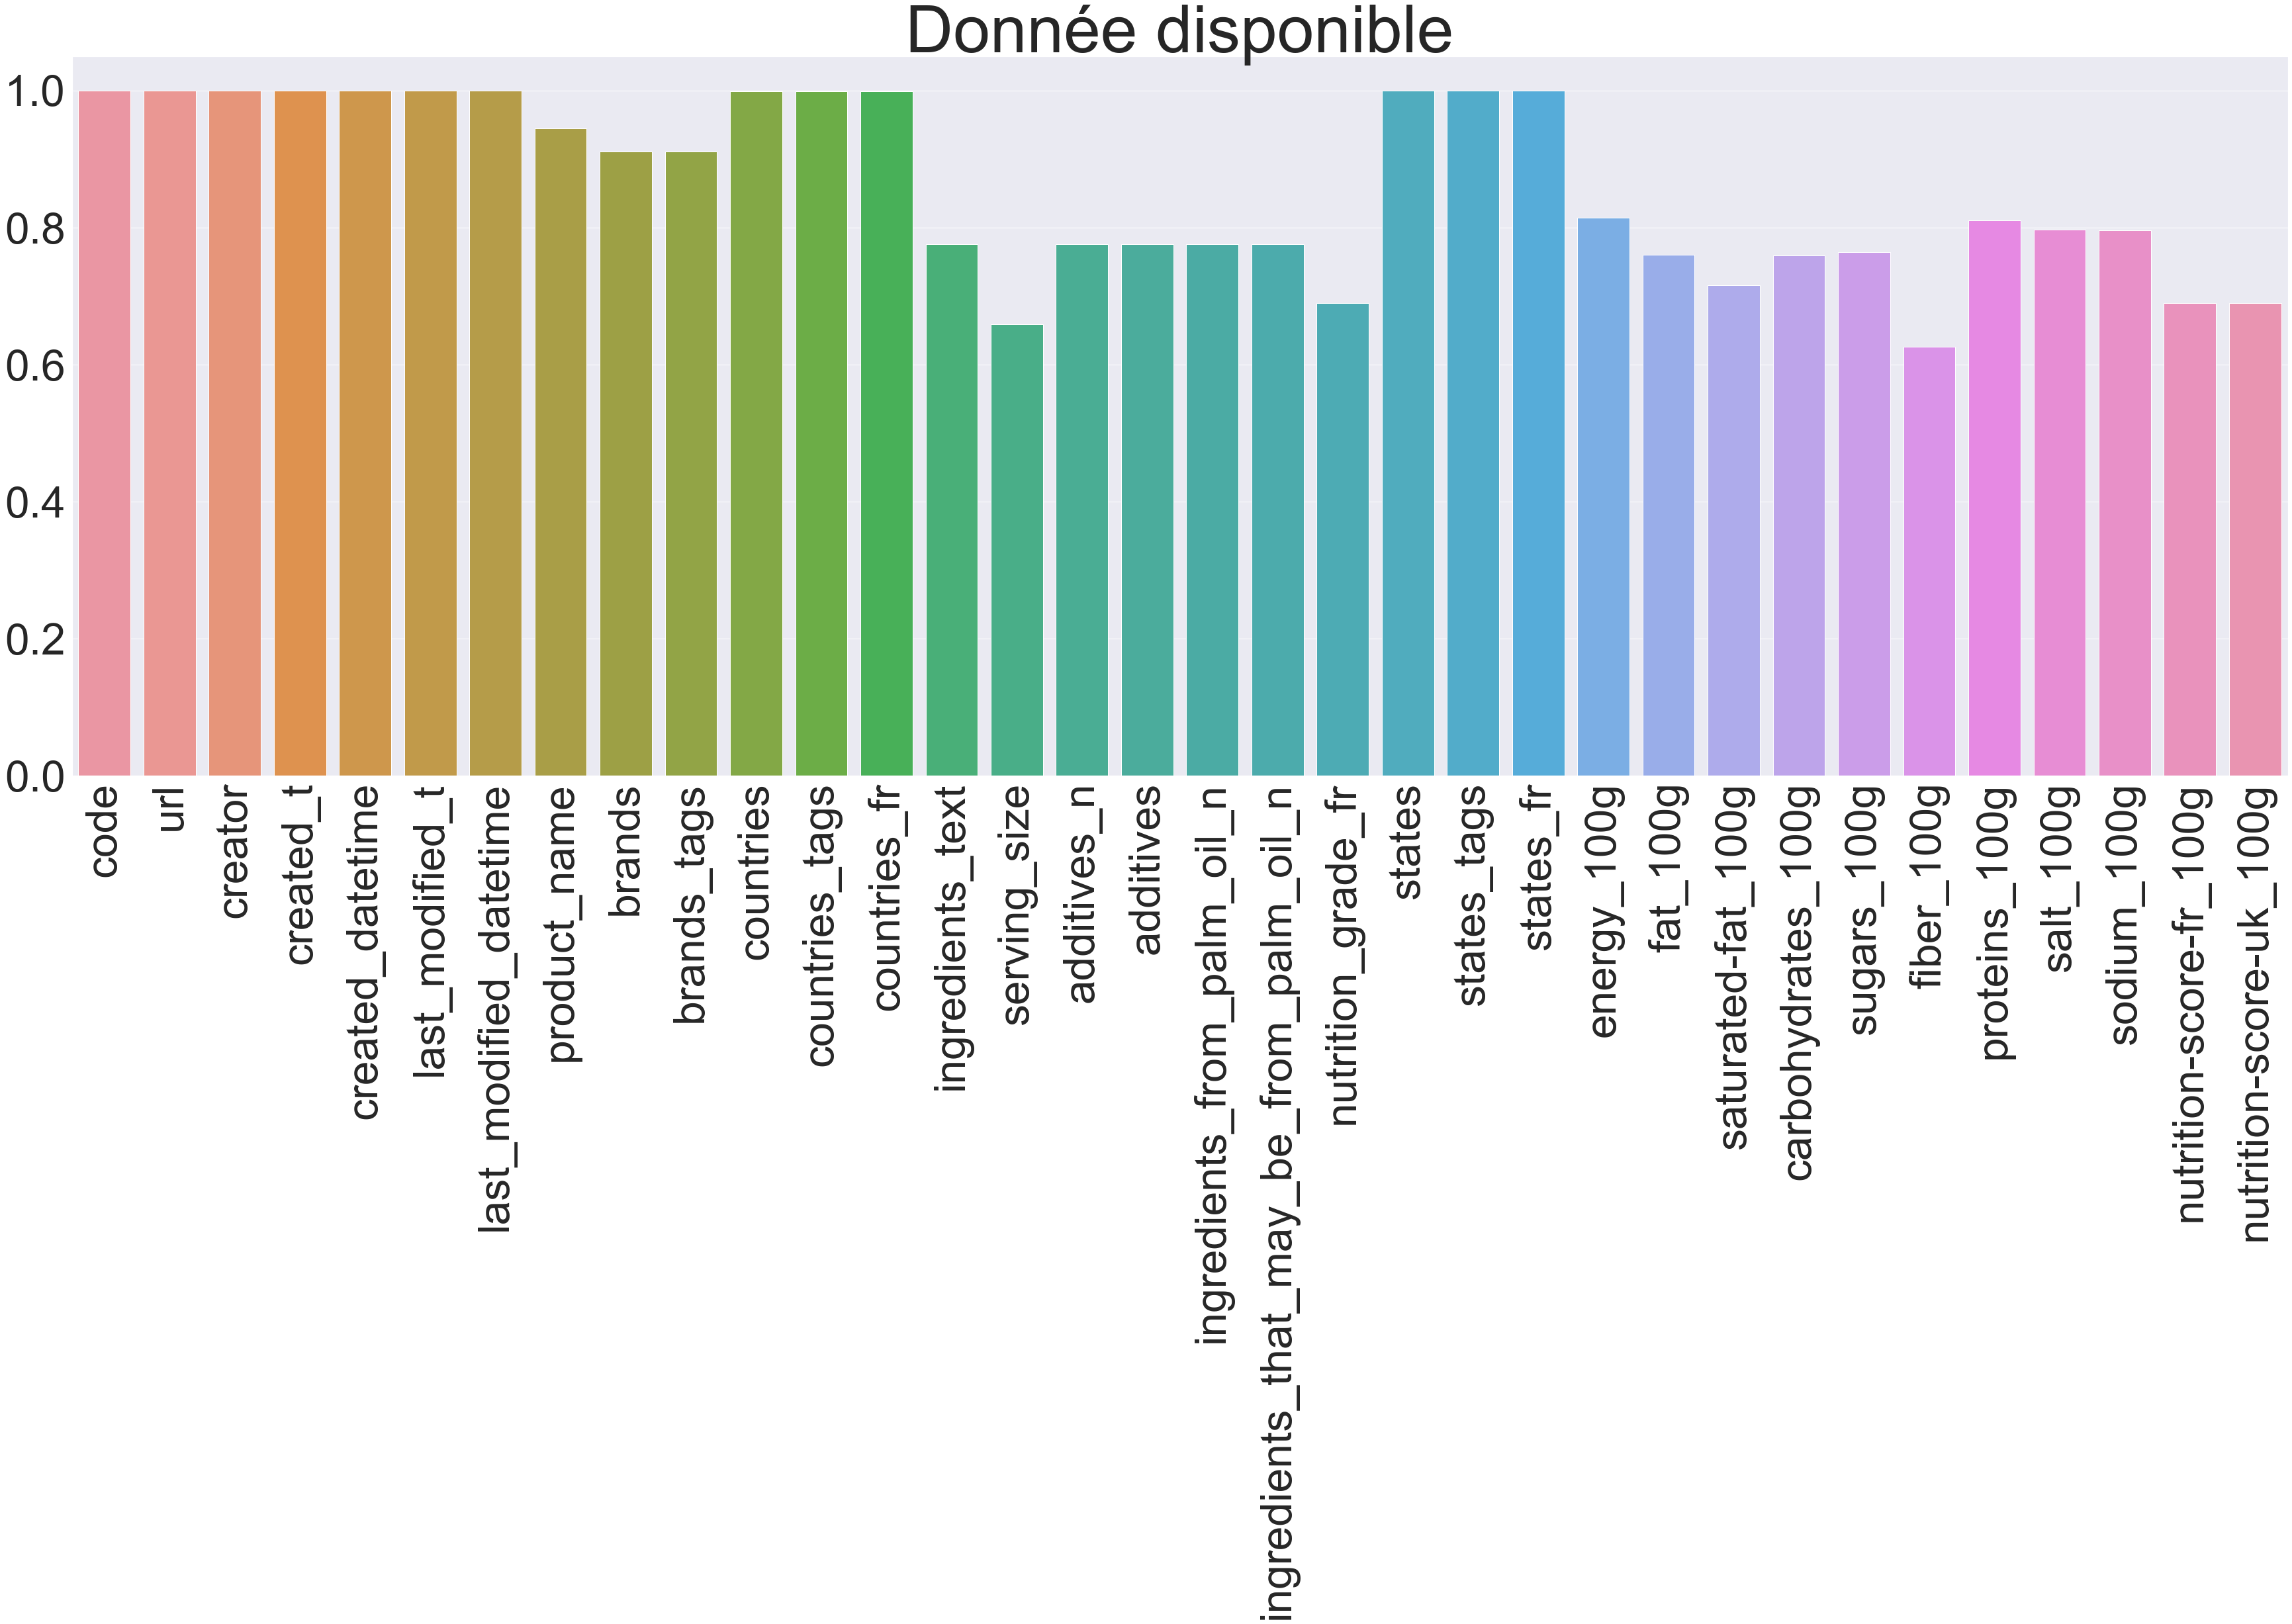

In [11]:
# On drop les colonnes avec trop de données manquante ( +50%)

def drop_data_threshold(data,threshold): 
    '''
    drop les colonnes avec trop de données manquante ( + threshold)
    Parameters :
    ----------
    data : pd.DataFrame
    threshold : float (compris entre 0 et 1)
    Return:
    data_drop : pd.DataFrame
    ------
    '''
    data_drop = data.copy()
    data_drop.dropna(axis = 1, how='all',thresh=len(data_drop)*threshold, inplace=True)
    return data_drop

sns.set(font_scale = 6,rc={'figure.figsize':(60,20)})

show_missing_data_graph(drop_data_threshold(data,0.5))

sns.set(font_scale = 1.5,rc={'figure.figsize':(60,20)})

In [12]:
data_drop = drop_data_threshold(data,0.5)

In [13]:
data_drop.shape

(320772, 34)

In [14]:
data_drop.dtypes

code                                        object
url                                         object
creator                                     object
created_t                                   object
created_datetime                            object
last_modified_t                             object
last_modified_datetime                      object
product_name                                object
brands                                      object
brands_tags                                 object
countries                                   object
countries_tags                              object
countries_fr                                object
ingredients_text                            object
serving_size                                object
additives_n                                float64
additives                                   object
ingredients_from_palm_oil_n                float64
ingredients_that_may_be_from_palm_oil_n    float64
nutrition_grade_fr             

In [15]:
# On selectionne les colonnes object pour faire le tris

data_drop.select_dtypes(include=[object]).columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr'],
      dtype='object')

## Conversion en datetime

In [16]:
# On test la conversion en datetime

data_drop['created_datetime']

0         2016-09-17T09:17:46Z
1         2017-03-09T14:32:37Z
2         2017-03-09T14:32:37Z
3         2017-03-09T10:35:31Z
4         2017-03-09T10:34:13Z
                  ...         
320767    2017-03-27T16:14:59Z
320768    2017-03-09T11:31:16Z
320769    2015-01-24T11:36:17Z
320770    2017-04-16T10:54:49Z
320771    2017-03-09T15:18:29Z
Name: created_datetime, Length: 320772, dtype: object

In [17]:
def data_datetime(data): 
    '''
    transforme les colonnes en datetime
    Parameters :
    ----------
    data : pd.DataFrame
    Return:
    ------
    '''
    data['created_datetime'] = pd.to_datetime(data['created_datetime'], \
                                                   format='%Y-%m-%dT%H:%M:%SZ',errors = 'coerce')
    data['last_modified_datetime'] = pd.to_datetime(data['last_modified_datetime'],\
                                                         format='%Y-%m-%dT%H:%M:%SZ',errors = 'coerce')
    
data_datetime(data_drop)

In [18]:
data_drop.dtypes

code                                               object
url                                                object
creator                                            object
created_t                                          object
created_datetime                           datetime64[ns]
last_modified_t                                    object
last_modified_datetime                     datetime64[ns]
product_name                                       object
brands                                             object
brands_tags                                        object
countries                                          object
countries_tags                                     object
countries_fr                                       object
ingredients_text                                   object
serving_size                                       object
additives_n                                       float64
additives                                          object
ingredients_fr

In [19]:
# On commence à réfléchir quel colonne on va supprimer

column_to_drop =['code', 'url', 'creator','created_t', 'created_datetime','last_modified_t', 'last_modified_datetime',\
                'brands','brands_tags', 'countries', 'countries_tags', 'ingredients_text',\
                'serving_size','states', 'states_tags', 'states_fr']

In [20]:
liste = list(data_drop.columns)
liste

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'brands',
 'brands_tags',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'serving_size',
 'additives_n',
 'additives',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'states',
 'states_tags',
 'states_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [21]:
data_drop.select_dtypes(exclude=[object]).columns

Index(['created_datetime', 'last_modified_datetime', 'additives_n',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [22]:
# On récupère les colonnes se finissant par 100g
liste_100 = [k for k in liste if k.endswith('_100g')]
liste_100

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [23]:
liste_100[1:9]

['fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

In [24]:
data_drop[liste_100]

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0
320769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Valeurs aberrantes

In [25]:
#imputer = SimpleImputer(strategy='constant',fill_value=0)
#imputer.fit(data_drop[liste_100])
#data_drop[liste_100] = imputer.transform(data_drop[liste_100])

In [26]:
#data_drop[liste_100]

<AxesSubplot:xlabel='energy_100g'>

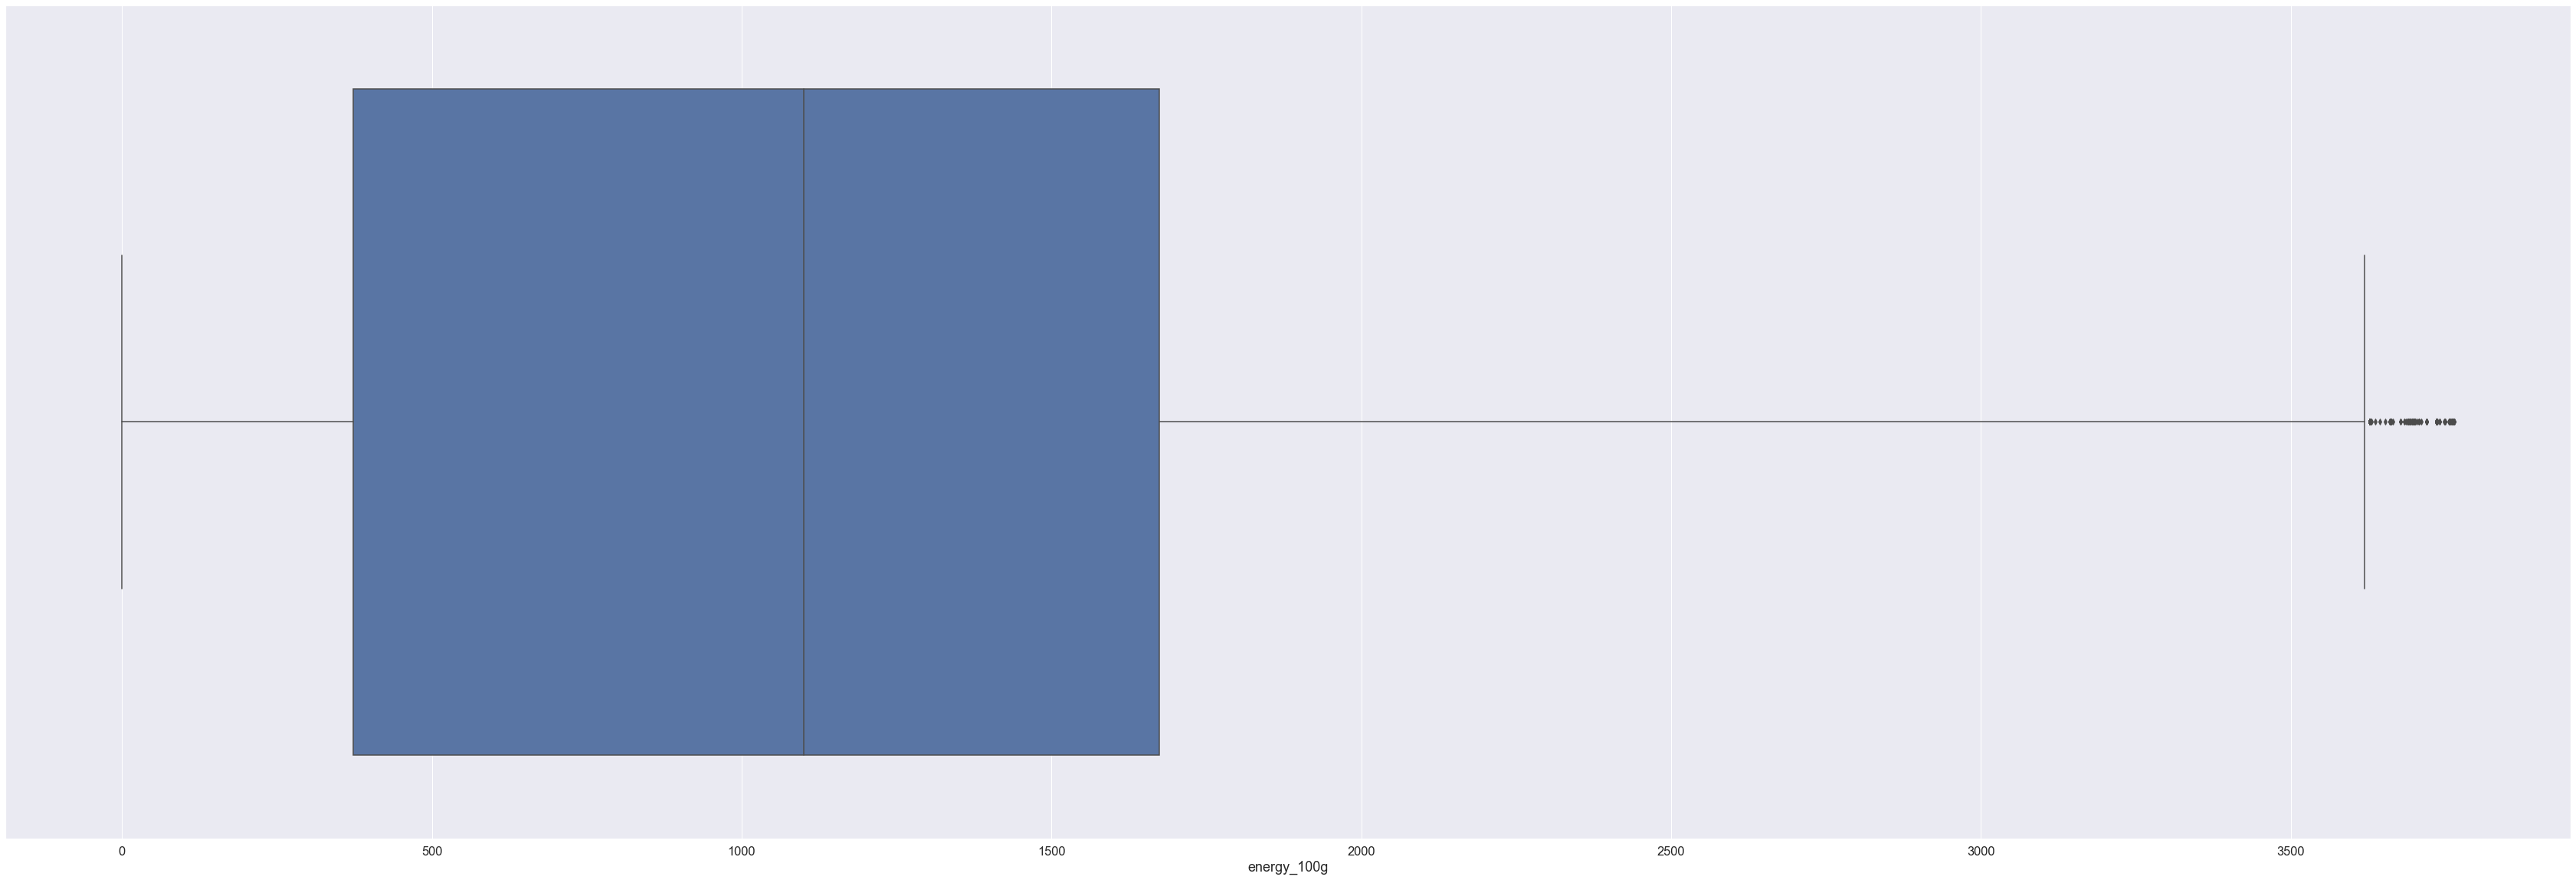

In [27]:
sns.boxplot(x =data_drop[data_drop['energy_100g']<3765]['energy_100g'])

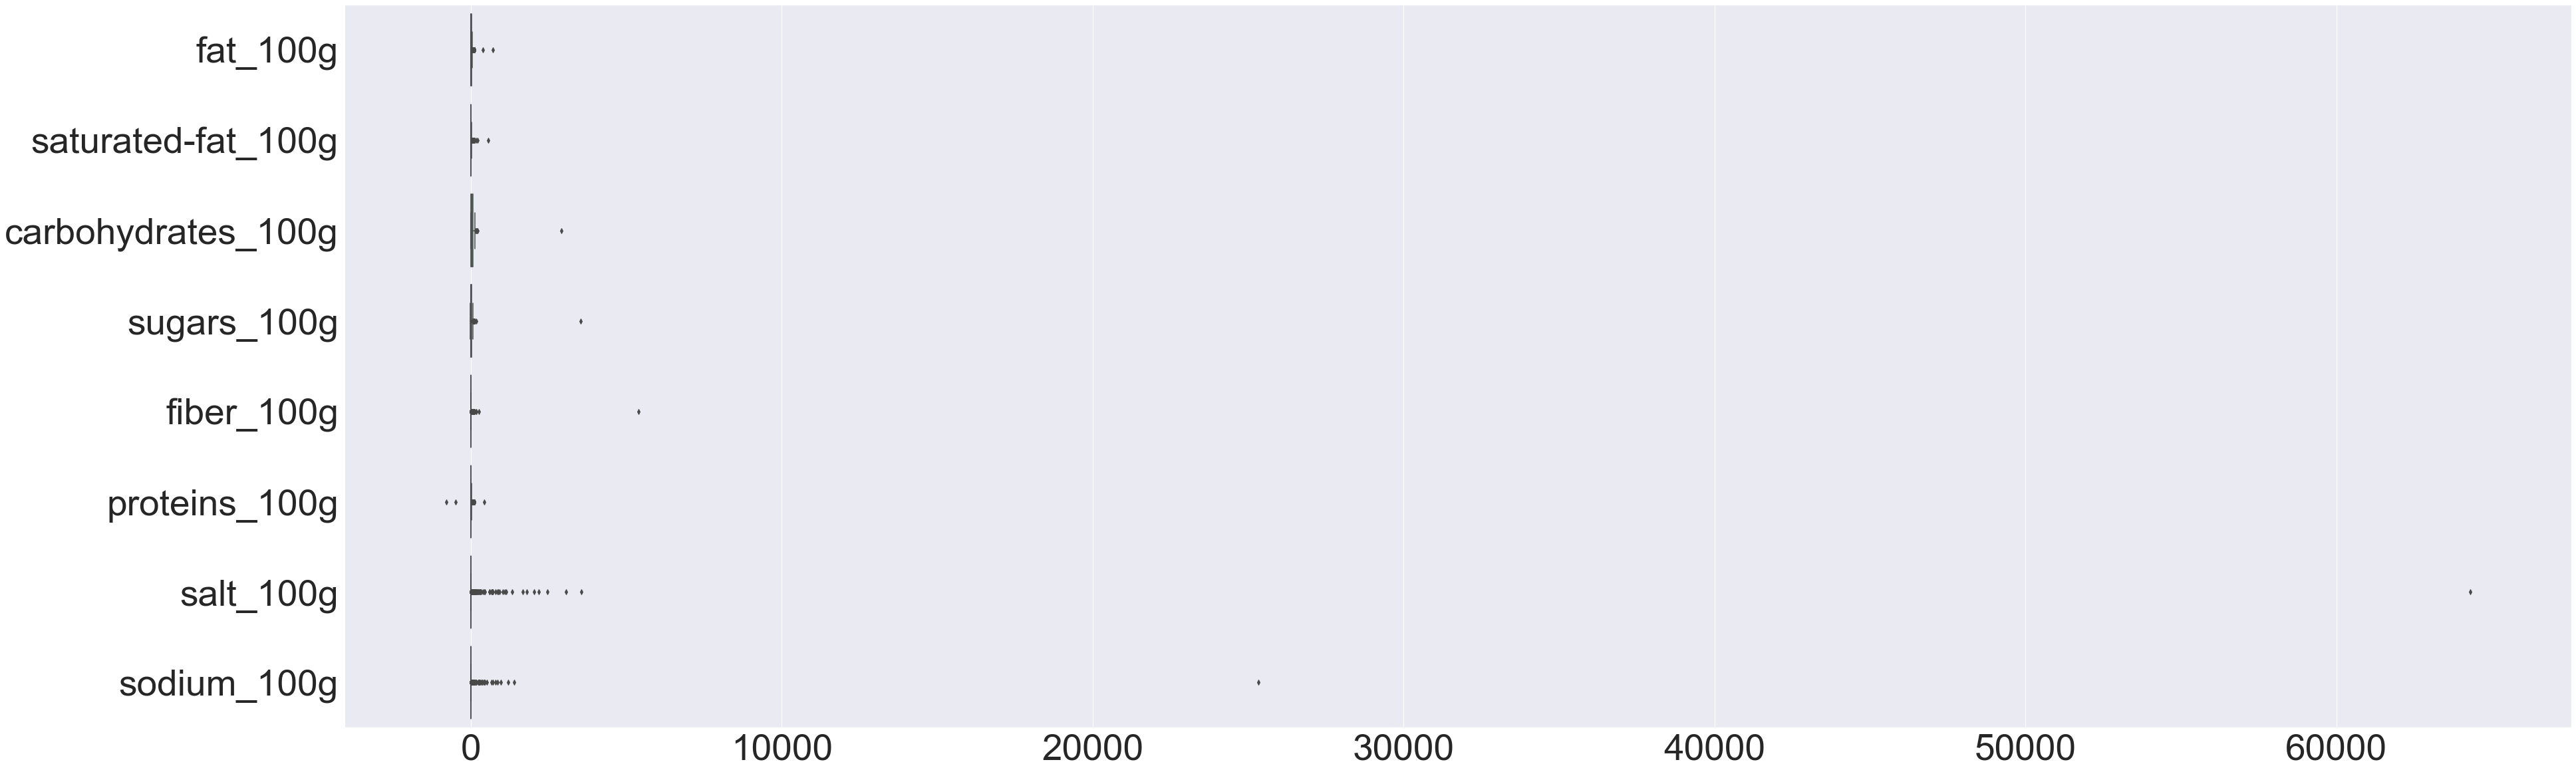

In [28]:
# On regarde la répartition de la composition 

liste_100_full = [k for k in liste if k.endswith('_100g')]

liste_100 = liste_100_full[1:9]
sns.set(font_scale=5)
sns.boxplot(data = data_drop[liste_100],orient='h');

# Il y a très nettement des valeurs abherantes 

In [29]:
data_ab = data_drop.copy()

In [30]:
# On remplace les valeurs abherante par des NaN
def data_ab_nan_composition(data,liste): 
    '''
    transforme les valeurs abherhantes en Nan
    Parameters :
    ----------
    data : pd.DataFrame
    liste : list
    Return:
    ------
    '''
    data[liste] = data[liste].applymap(lambda x: np.nan if ((x > 100) or (x<0))  else x)

In [31]:
data_ab_nan_composition(data_ab,liste_100)

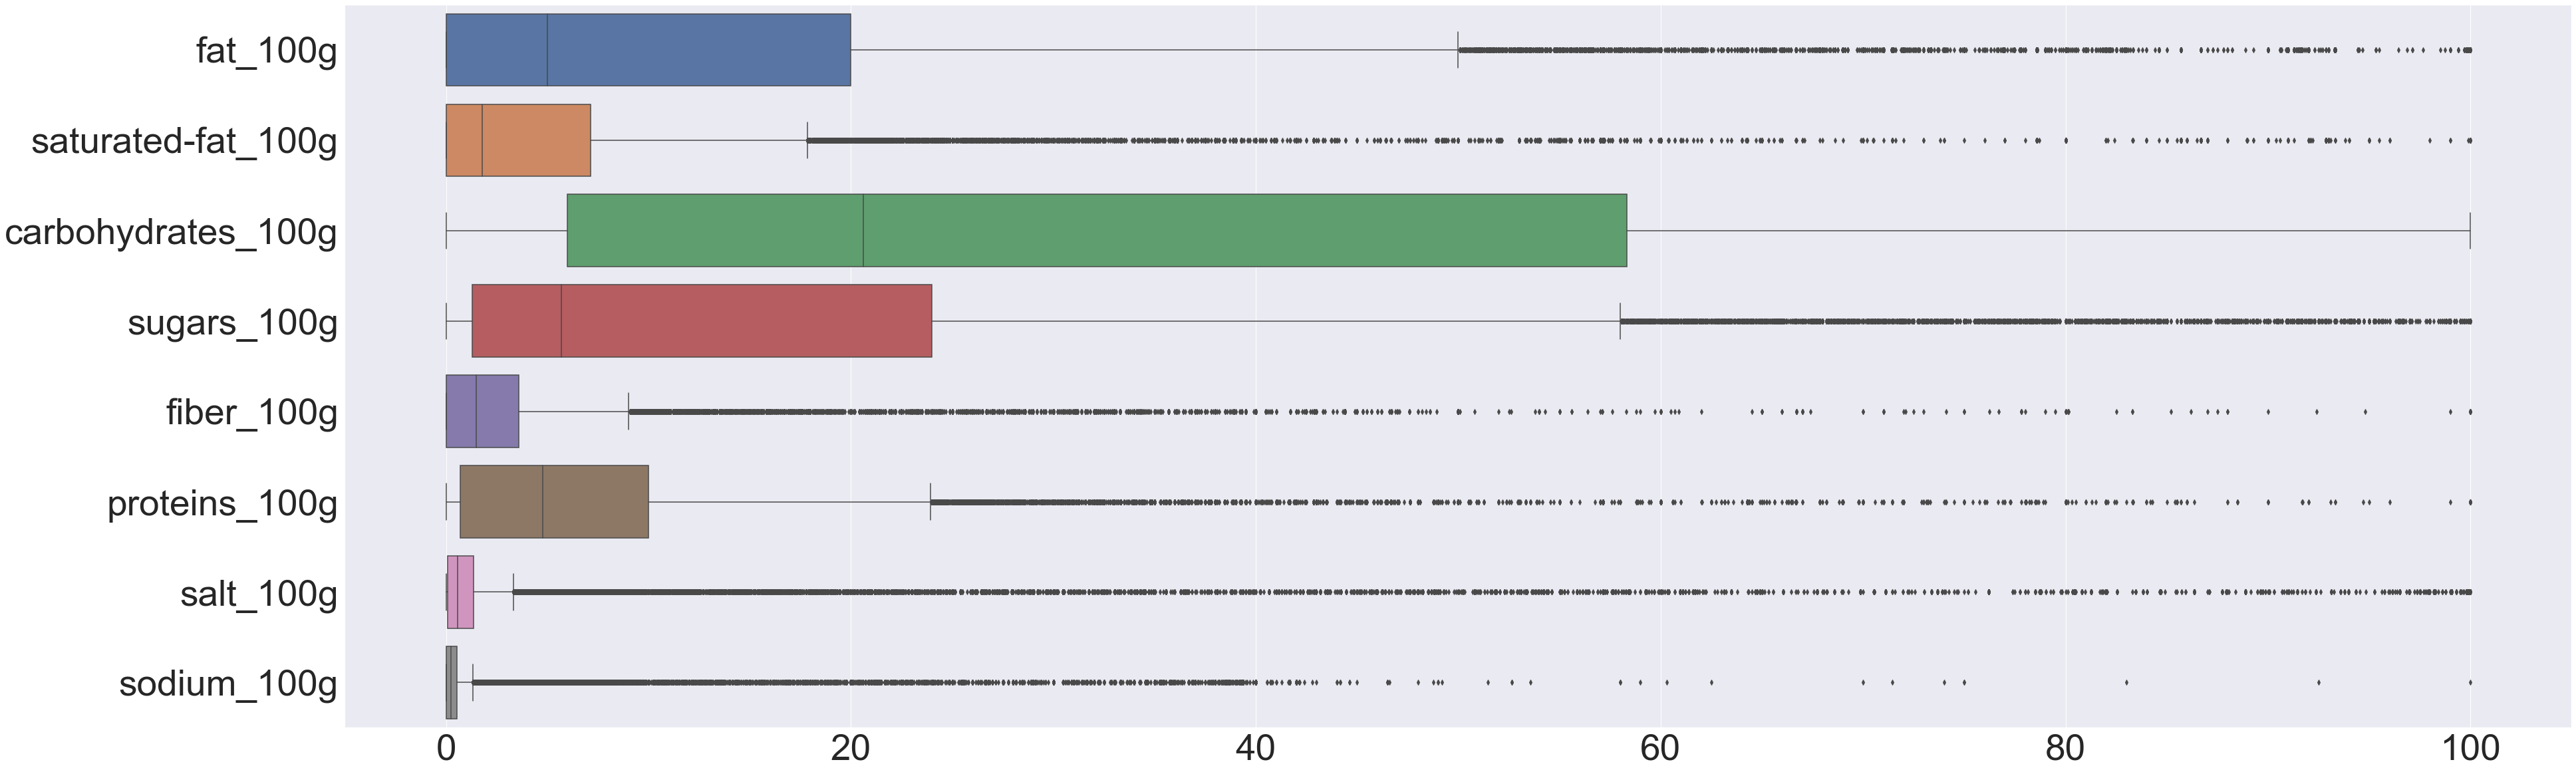

In [32]:
# On check si les valeurs abherantes ont bien disparus
sns.set(font_scale=5)
sns.boxplot(data = data_ab[liste_100],orient='h');

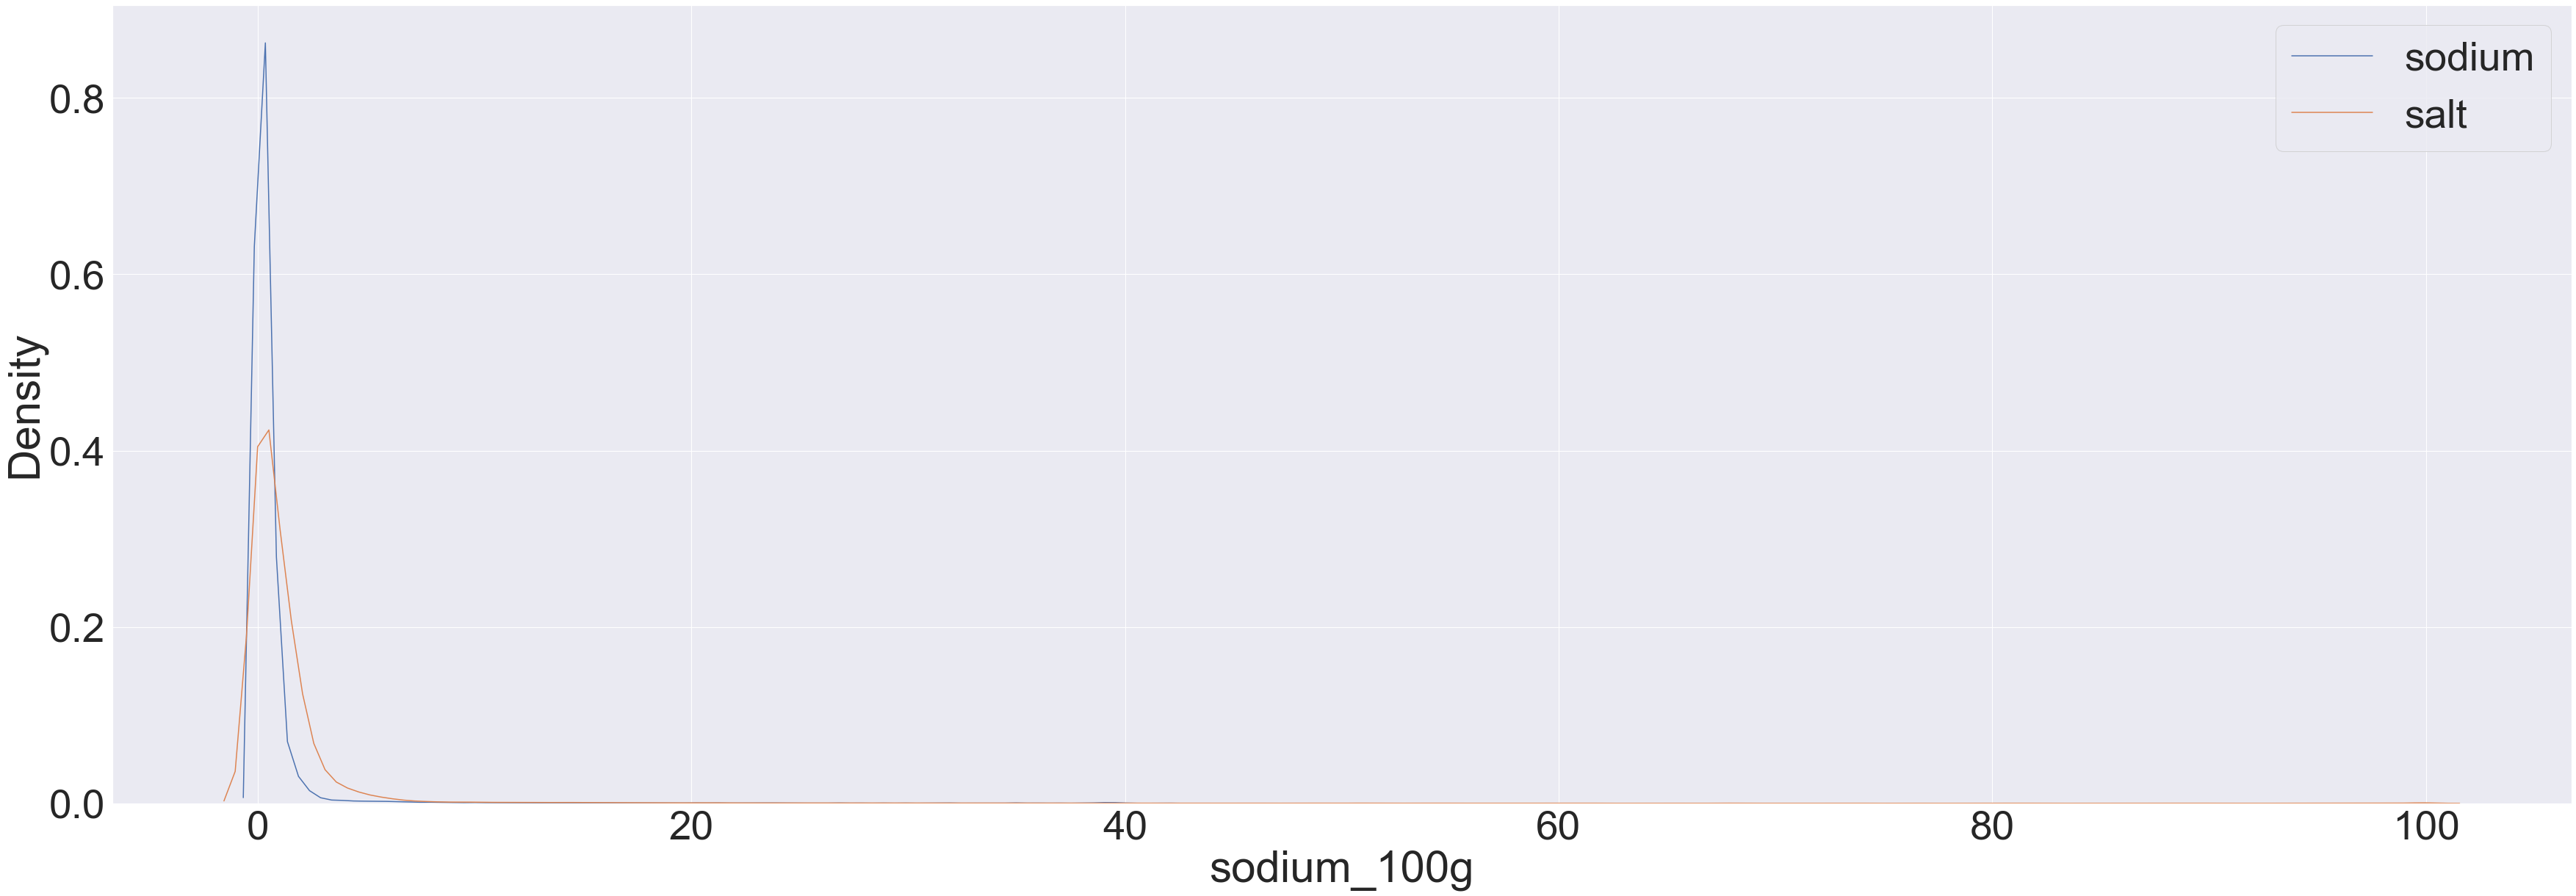

In [33]:
# Doute sur le liens entre Sodium et sel

sns.kdeplot(x = data_ab['sodium_100g'],label='sodium')
sns.kdeplot(x = data_ab['salt_100g'],label='salt')
plt.legend()

In [34]:
# On crée une fonction pour faire la somme des colonnes 100g souhaité
def colonnes_somme(data,colonne_pour_somme,name):
    '''
    fait la somme des colonnes sélectionné
    Parameters :
    ----------
    data : pd.DataFrame
    colonne_pour_somme : list
    name : str
    Return:
    ------
    '''
    data[name] = data[colonne_pour_somme].sum(axis=1)


<AxesSubplot:>

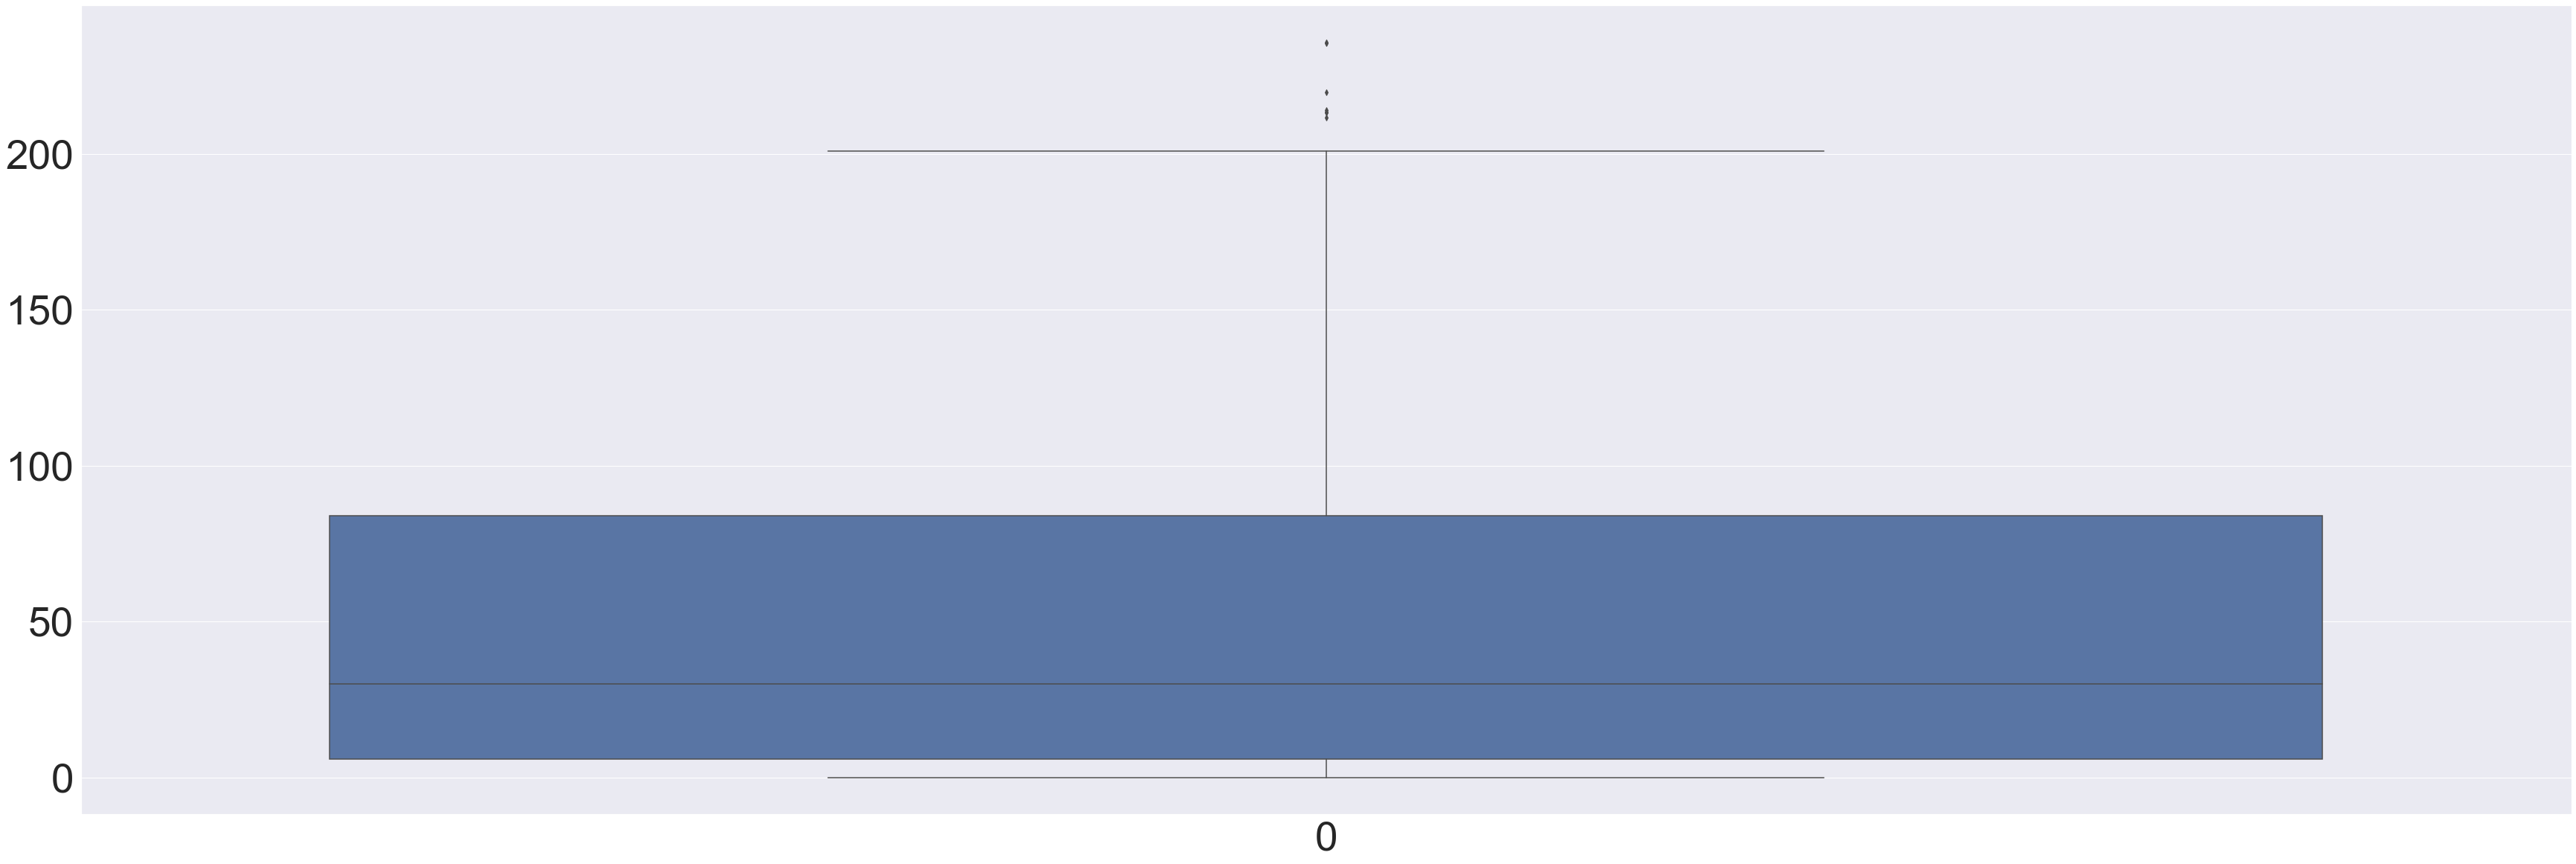

In [35]:
# On selectionne soigneusement les colonnes 100g dont on veut faire la somme

colonne_pour_somme = ['fat_100g','carbohydrates_100g','fiber_100g','proteins_100g','sodium_100g']    

colonnes_somme(data_ab,colonne_pour_somme,'sum_100g')

# Puis on regarde à quoi ressemble les valeurs de cette colonne :

sns.boxplot(data = data_ab['sum_100g'])

# De toute evidence, il y a beaucoup de valeurs abherante

In [36]:
# On vérifie que le min est bien 0 ( pas de raison que ça ne le soit pas )

data_ab[['sum_100g']].min()

sum_100g    0.0
dtype: float64

In [37]:
# On se débarasse des valeurs > 100

data_ab = data_ab[data_ab['sum_100g']<=100]

In [38]:
data_ab['sum_100g'].max()

100.0

In [39]:
# On remarque beaucoup de 0. Certaines colonnes ne sont sans doute pas assez remplis
data_ab['sum_100g']

0           0.00
4          92.84
6          88.89
9         100.00
10         98.96
           ...  
320767      0.00
320768      0.00
320769      0.00
320770      0.00
320771      0.00
Name: sum_100g, Length: 300252, dtype: float64

<AxesSubplot:>

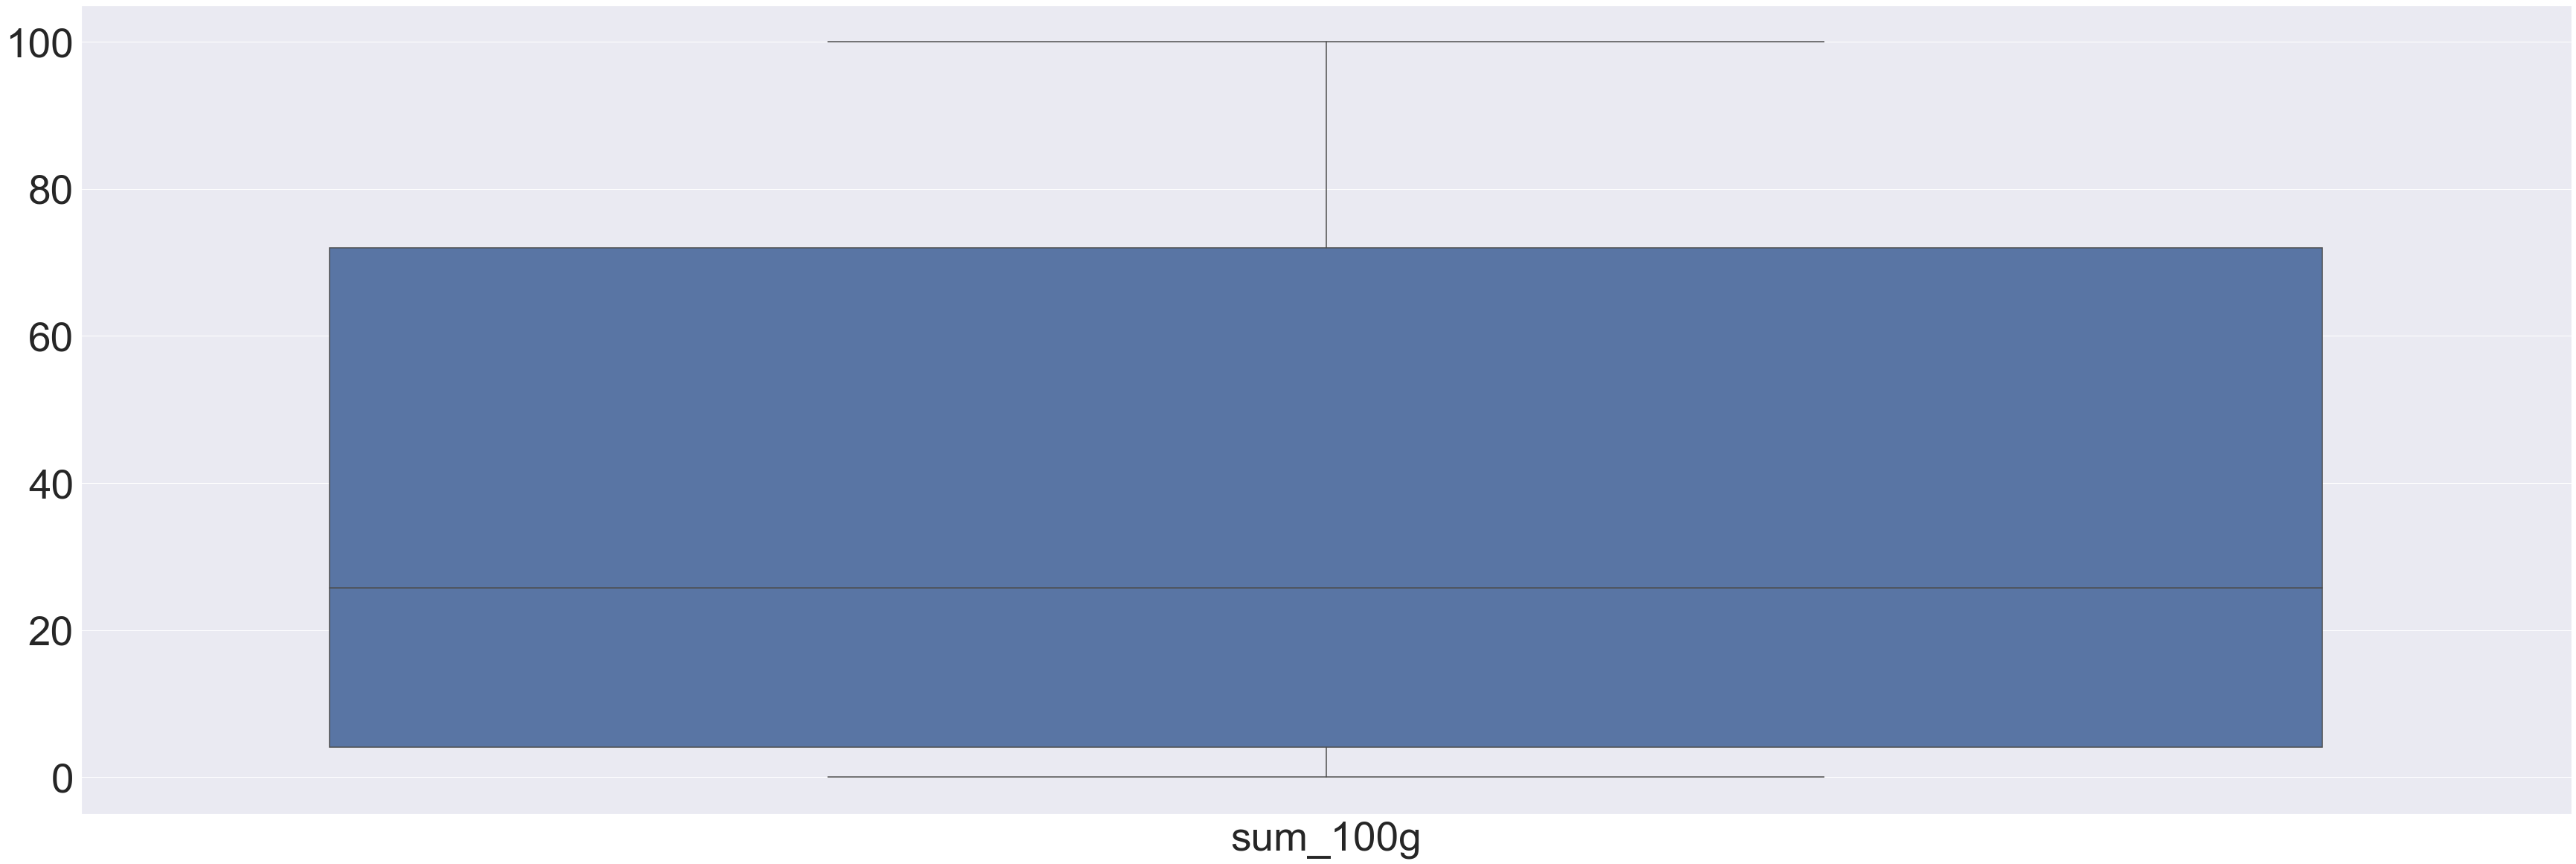

In [40]:
sns.boxplot(data = data_ab[['sum_100g']])

In [41]:
data_ab

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,sum_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17 09:17:46,1474103893,2016-09-17 09:18:13,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09 10:34:13,1489055653,2017-03-09 10:34:13,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,92.84
6,0000000016117,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055730,2017-03-09 10:35:30,1489055730,2017-03-09 10:35:30,Organic Long Grain White Rice,Lundberg,lundberg,US,en:united-states,États-Unis,Organic long grain white rice,45 g (0.25 cup),0.0,[ organic-long-grain-white-rice -> en:organic...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1490.0,NaN,NaN,80.00,NaN,NaN,8.89,NaN,NaN,NaN,NaN,88.89
9,0000000016513,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055654,2017-03-09 10:34:14,1489055654,2017-03-09 10:34:14,Organic Sunflower Oil,Napa Valley Naturals,napa-valley-naturals,US,en:united-states,États-Unis,"Organic expeller pressed, refined high oleic s...",14 g (1 Tbsp),0.0,[ organic-expeller-pressed -> en:organic-expe...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",3586.0,100.00,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00
10,0000000016612,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09 10:35:31,1489055731,2017-03-09 10:35:31,Organic Adzuki Beans,Unfi,unfi,US,en:united-states,États-Unis,Organic adzuki beans,48 g (0.25 cup),0.0,[ organic-adzuki-beans -> en:organic-adzuki-b...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1393.0,1.04,NaN,62.50,NaN,12.5,22.92,NaN,NaN,NaN,NaN,98.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27 16:14:59,1491244498,2017-04-03 18:34:58,Tomato & ricotta,Panzani,panzani,en:RO,en:romania,Roumanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09 11:31:16,1491244499,2017-04-03 18:34:59,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,US,en:united-states,États-Unis,"Organic 

In [42]:
liste_100

['fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

In [43]:
# On vérifie le remplissage de chaque ligne. On ne garde que celle qui sont remplis à au moins 50%
def colonnes_somme(data,colonne_pour_drop,threshold):
    '''
    se debarasse des lignes ne contenant pas assez d'information dans une liste de colonne donnée, selon un seuil choisi
    Parameters :
    ----------
    data : pd.DataFrame
    colonne_pour_drop : list
    Return:
    ------
    '''
    data['donnée manquante'] = data[colonne_pour_drop].isna().sum(axis=1)/len(colonne_pour_drop)
    return data[data['donnée manquante']<= threshold]

In [44]:

data_ab = colonnes_somme(data_ab,liste_100,0.5)

In [45]:
data_ab

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,sum_100g,donnée manquante
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09 10:34:13,1489055653,2017-03-09 10:34:13,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,92.840000,0.500
10,0000000016612,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09 10:35:31,1489055731,2017-03-09 10:35:31,Organic Adzuki Beans,Unfi,unfi,US,en:united-states,États-Unis,Organic adzuki beans,48 g (0.25 cup),0.0,[ organic-adzuki-beans -> en:organic-adzuki-b...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1393.0,1.04,NaN,62.50,NaN,12.5,22.92,NaN,NaN,NaN,NaN,98.960000,0.500
11,0000000016650,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055668,2017-03-09 10:34:28,1489055668,2017-03-09 10:34:28,Organic Penne Pasta,Gardentime,gardentime,US,en:united-states,États-Unis,Organic refined durum semolina wheat flour,57 g (0.5 cup),0.0,[ organic-refined-durum-semolina-wheat-flour ...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1540.0,1.75,NaN,73.68,NaN,1.8,14.04,NaN,NaN,NaN,NaN,91.270000,0.500
12,0000000016872,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055650,2017-03-09 10:34:10,1489055651,2017-03-09 10:34:11,Zen Party Mix,Sunridge,sunridge,US,en:united-states,États-Unis,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),1.0,[ roasted-peanuts -> en:roasted-peanuts ] [...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633000,12.0,12.0,97.343000,0.000
17,0000000018173,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055667,2017-03-09 10:34:27,1489055667,2017-03-09 10:34:27,Organic Sweetened Banana Chips,Unfi,unfi,US,en:united-states,États-Unis,"Organic bananas, organic coconut oil, organic ...",30 g (0.25 cup),0.0,[ organic-bananas -> en:organic-bananas ] [...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2092.0,26.67,23.33,66.67,16.67,3.3,3.33,NaN,NaN,NaN,NaN,99.970000,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320756,989898,http://world-fr.openfoodfacts.org/produit/9898...,openfoodfacts-contributors,1473694809,2016-09-12 15:40:09,1473694815,2016-09-12 15:40:15,Test NF App,NaN,NaN,en:CH,en:switzerland,Suisse,"Coco, choco",NaN,0.0,[ coco -> fr:coco ] [ choco -> fr:choco ],0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",569.0,31.00,NaN,12.20,9.60,1.1,2.10,1.10000,0.433071,NaN,NaN,46.833071,0.125
320757,9900000000233,http://world-fr.op

In [46]:
data_ab['donnée manquante'].max()

0.5

<AxesSubplot:>

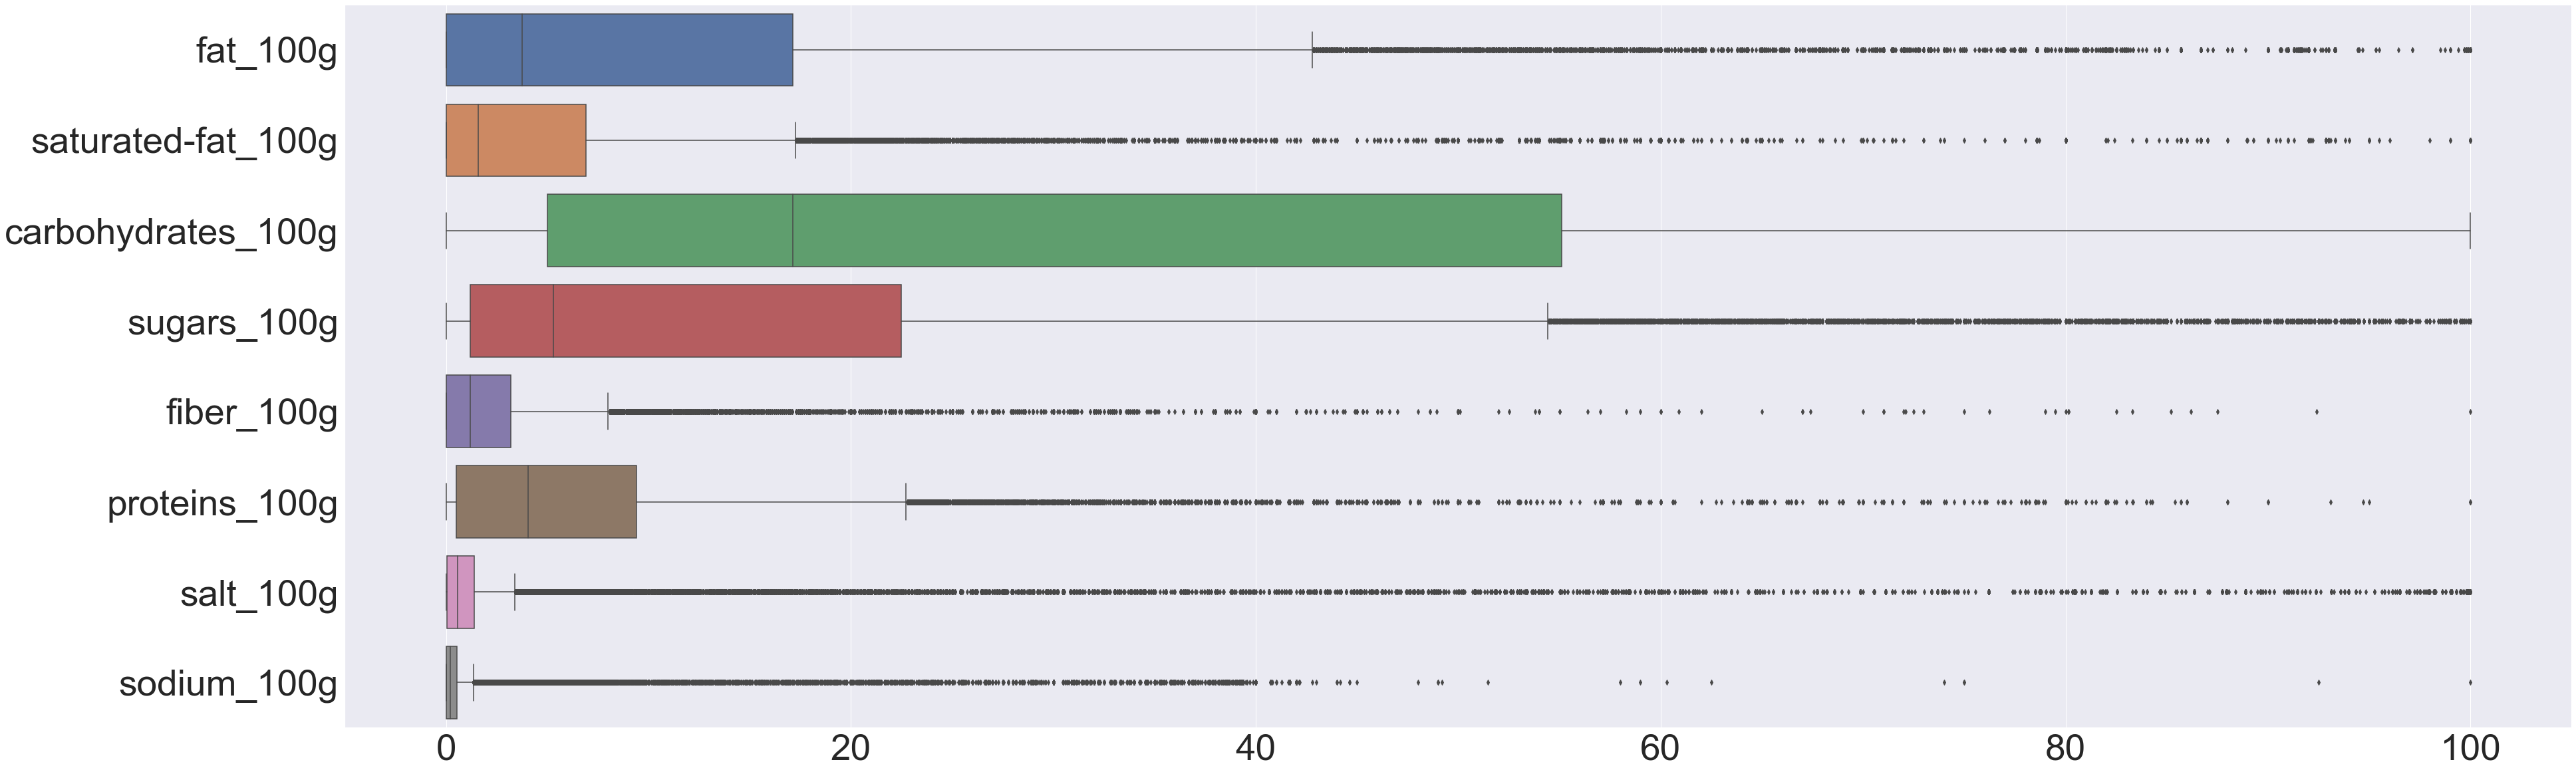

In [47]:
sns.boxplot(data = data_ab[liste_100],orient='h')

In [48]:
liste_100

['fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

In [49]:
# On check à quoi ressemble valeurs extremes

data_ab[data_ab['fiber_100g']== 100]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,sum_100g,donnée manquante
244661,3590670000174,http://world-fr.openfoodfacts.org/produit/3590...,kiliweb,1492441820,2017-04-17 15:10:20,1492441822,2017-04-17 15:10:22,Noix sèches,Pepinoix,pepinoix,France,en:france,France,Noix sèches,NaN,0.0,[ noix-seches -> fr:noix-seches ] [ noix ->...,0.0,0.0,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,-5.0,-5.0,100.0,0.0


<AxesSubplot:xlabel='energy_100g'>

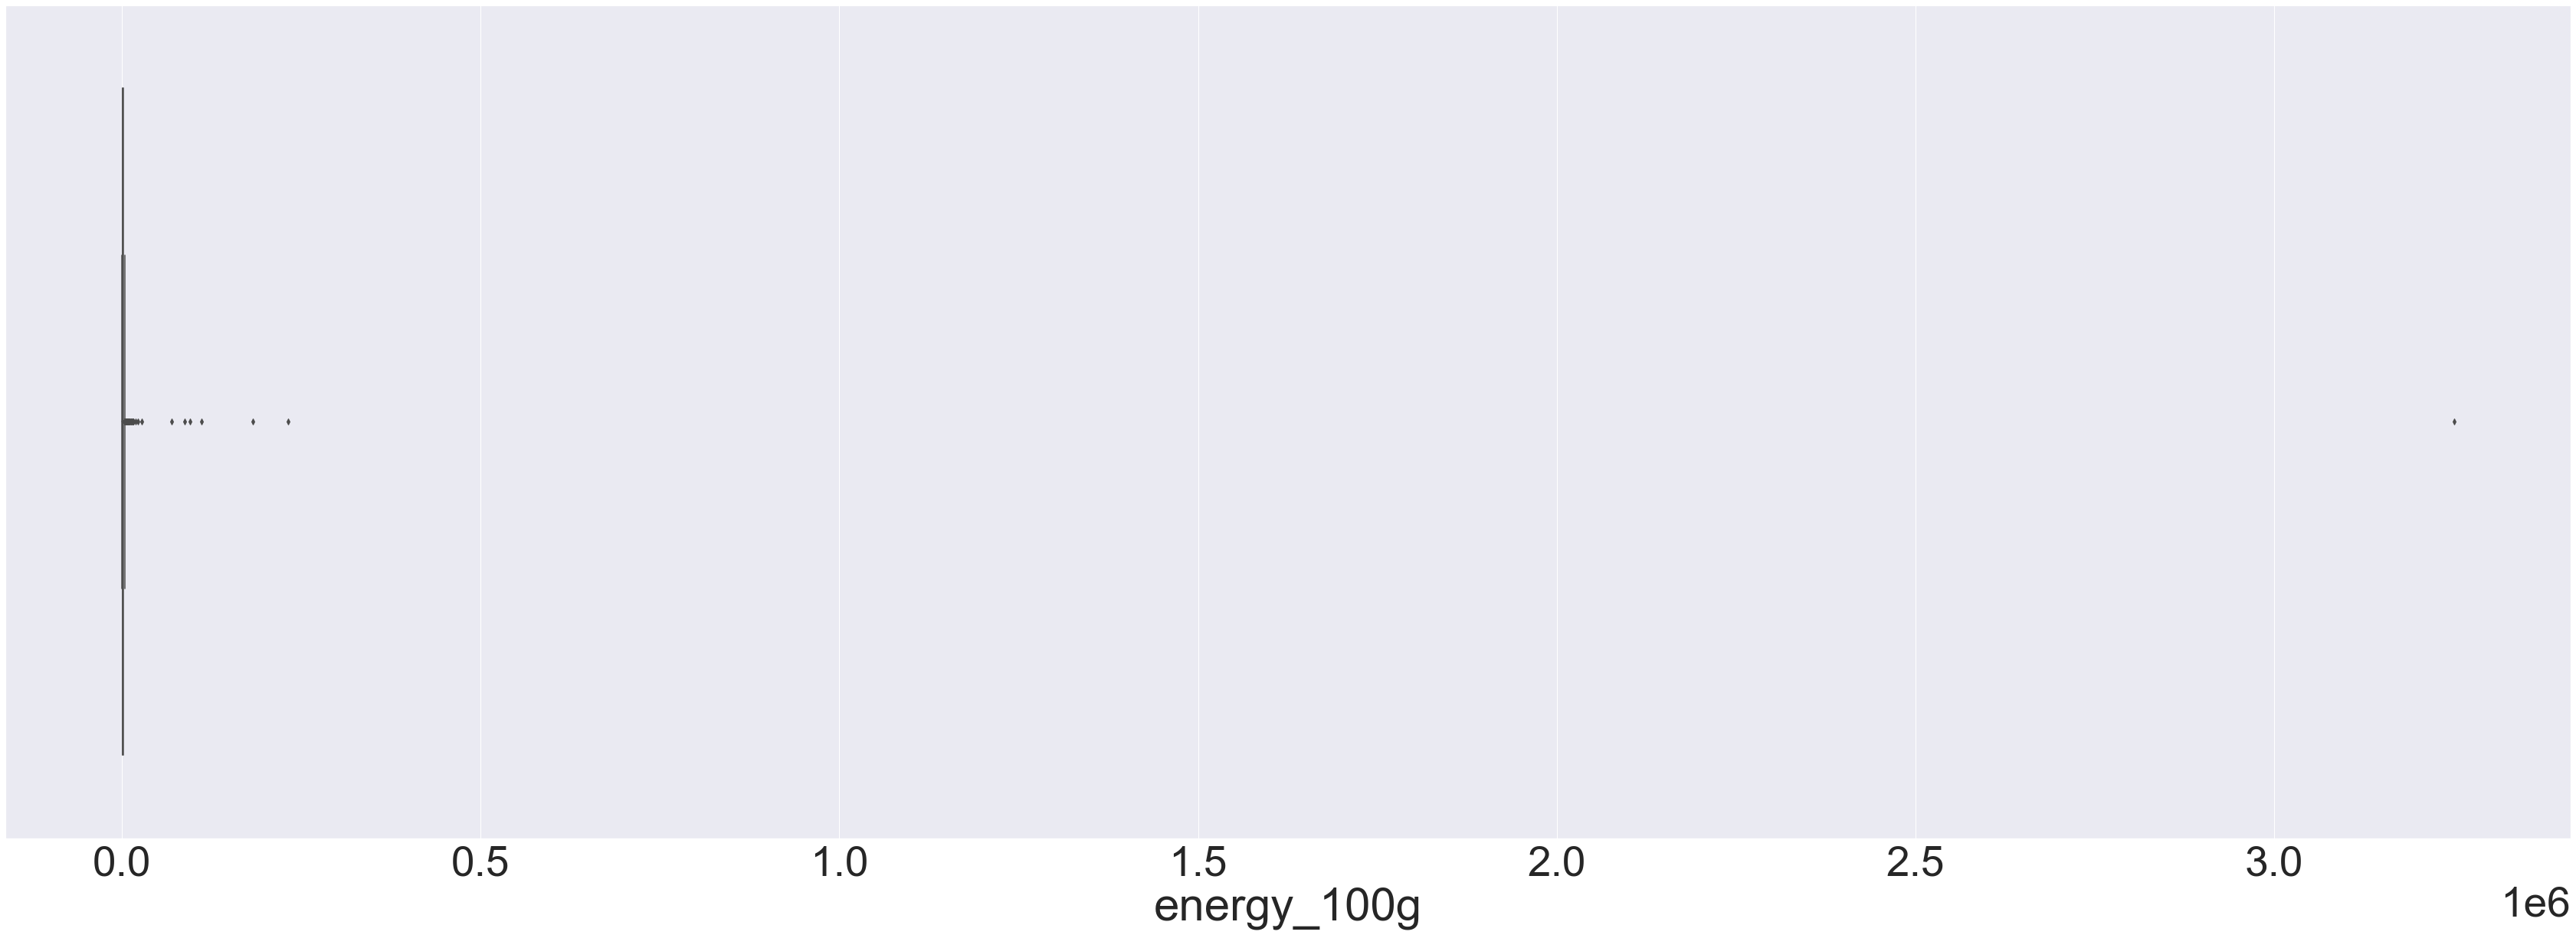

In [50]:
# On regarde la colonne energy_100g

sns.boxplot(x =data_drop['energy_100g'])

In [51]:
data_ab.shape

(236494, 36)

In [52]:
# L'energie maximum d'une quantité de 100g de nourriture est de 3765 joule (100g de gras, le plus energetique, correspond à 3765 joules)

data_ab[data_ab['energy_100g']<3765].shape

(235499, 36)

In [53]:
def data_ab_nan_energy(data,colonne): 
    '''
    transforme les valeurs abherhantes en Nan
    Parameters :
    ----------
    data : pd.DataFrame
    colonne : str
    Return:
    ------
    '''
    data[colonne] = data[colonne].apply(lambda x: np.nan if ((x > 3765) or (x<0))  else x)

#data_drop['energy_100g'] = data_drop['energy_100g'].apply(lambda x: np.nan if ((x > 3765) or (x<0))  else x)

In [54]:
data_ab_nan_energy(data_ab,'energy_100g')

C:\Users\Louis\AppData\Local\Temp/ipykernel_15176/3327447624.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colonne] = data[colonne].apply(lambda x: np.nan if ((x > 3765) or (x<0))  else x)


<AxesSubplot:xlabel='energy_100g'>

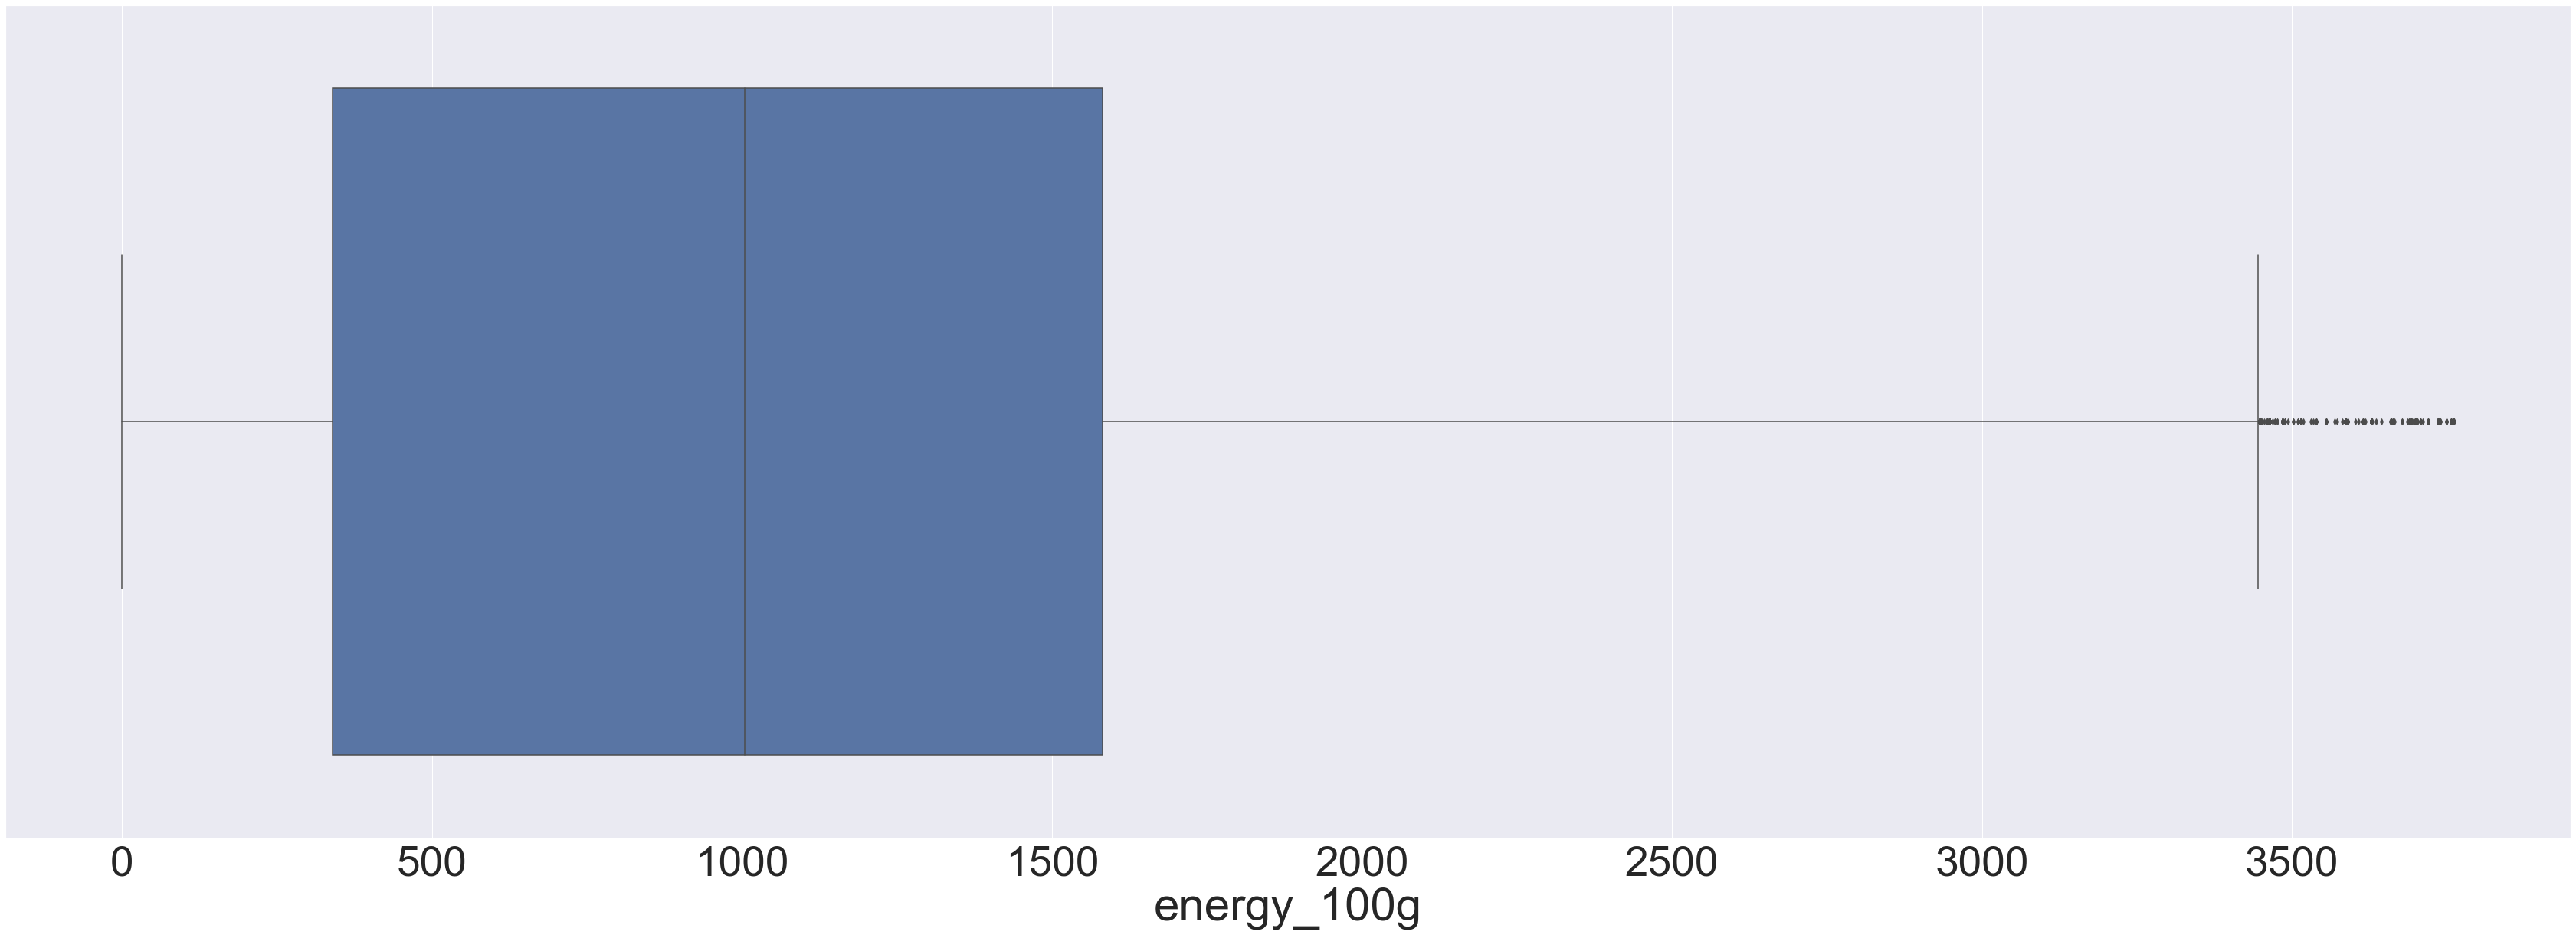

In [55]:
sns.boxplot(x =data_ab['energy_100g'])

In [56]:
# On observe les valeurs extremes

data_ab[data_ab['energy_100g']>=  3500]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,sum_100g,donnée manquante
255,0000111048403,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489052473,2017-03-09 09:41:13,1489052473,2017-03-09 09:41:13,100% Pure Canola Oil,Canola Harvest,canola-harvest,US,en:united-states,États-Unis,100% canola oil .,14 g (1 Tbsp),0.0,[ 100-canola-oil -> en:100-canola-oil ] [ c...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",3586.0,100.00,7.14,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,100.00,0.250
531,00026700547300,http://world-fr.openfoodfacts.org/produit/0002...,usda-ndb-import,1489078277,2017-03-09 16:51:17,1489078277,2017-03-09 16:51:17,"Ventura, Soybean - Peanut Frying Oil Blend",Ventura Foods L.L.C.,ventura-foods-l-l-c,US,en:united-states,États-Unis,"Peanut oil, soybean oil, tbhq and citric acid ...",14 g (1 Tbsp),0.0,[ peanut-oil -> en:peanut-oil ] [ oil -> en...,0.0,0.0,e,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",3586.0,100.00,17.86,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,100.00,0.000
629,0005404490105,http://world-fr.openfoodfacts.org/produit/0005...,usda-ndb-import,1489059169,2017-03-09 11:32:49,1489059169,2017-03-09 11:32:49,Extra Virgin Olive Oil,Fresh Aisle,fresh-aisle,US,en:united-states,États-Unis,Extra virgin olive oil,14 g (1 Tbsp),0.0,[ extra-virgin-olive-oil -> en:extra-virgin-o...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",3586.0,100.00,14.29,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,100.00,0.250
3934,0011110853868,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489077928,2017-03-09 16:45:28,1489077928,2017-03-09 16:45:28,Pure Coconut Oil,"Kroger, The Kroger Co.","kroger,the-kroger-co",US,en:united-states,États-Unis,Coconut oil.,14 g (1 Tbsp),0.0,[ coconut-oil -> en:coconut-oil ] [ oil -> ...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",3586.0,100.00,92.86,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,100.00,0.250
3973,0011110856050,http://world-fr.openfoodfacts.org/produit/0011...,openfoodfacts-contributors,1354090863,2012-11-28 08:21:03,1489063593,2017-03-09 12:46:33,NaN,Kroger,kroger,États-Unis,en:united-states,États-Unis,NaN,14 g (1 Tbsp),NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",3586.0,100.00,14.29,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,100.00,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316288,8801007440750,http://world-fr.openfoodfacts.org/produit/8801...,usda-ndb-import,1489070576,2017-03-09 14:42:56,1489070576,2017-03-09 14:42:56,Premium Sesame Oil,Beksul,beksul,US,en:united-states,États-Unis,Sesame oil.,15 ml (1 Tbsp),0.0,[ sesame-oil -> en:sesame-oil ] [ oil -> en...,0.0,0.0,e,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",3628.0,93.33,16.67,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,93.33,0.000
316334,8801045448503,http://world-fr.openfoodfacts.org/produit/8801...,usda-ndb-impo

# Remplissage de la donnée manquante

In [57]:
data_fill = data_ab.copy()

In [58]:
# On commence par remplir les données manquante de fibre par des 0

imputer_fiber = SimpleImputer(strategy='constant',fill_value=0)
imputer_fiber.fit(data_fill[['fiber_100g']])

SimpleImputer(fill_value=0, strategy='constant')

In [59]:
data_fill[['fiber_100g']] = imputer_fiber.transform(data_fill[['fiber_100g']])

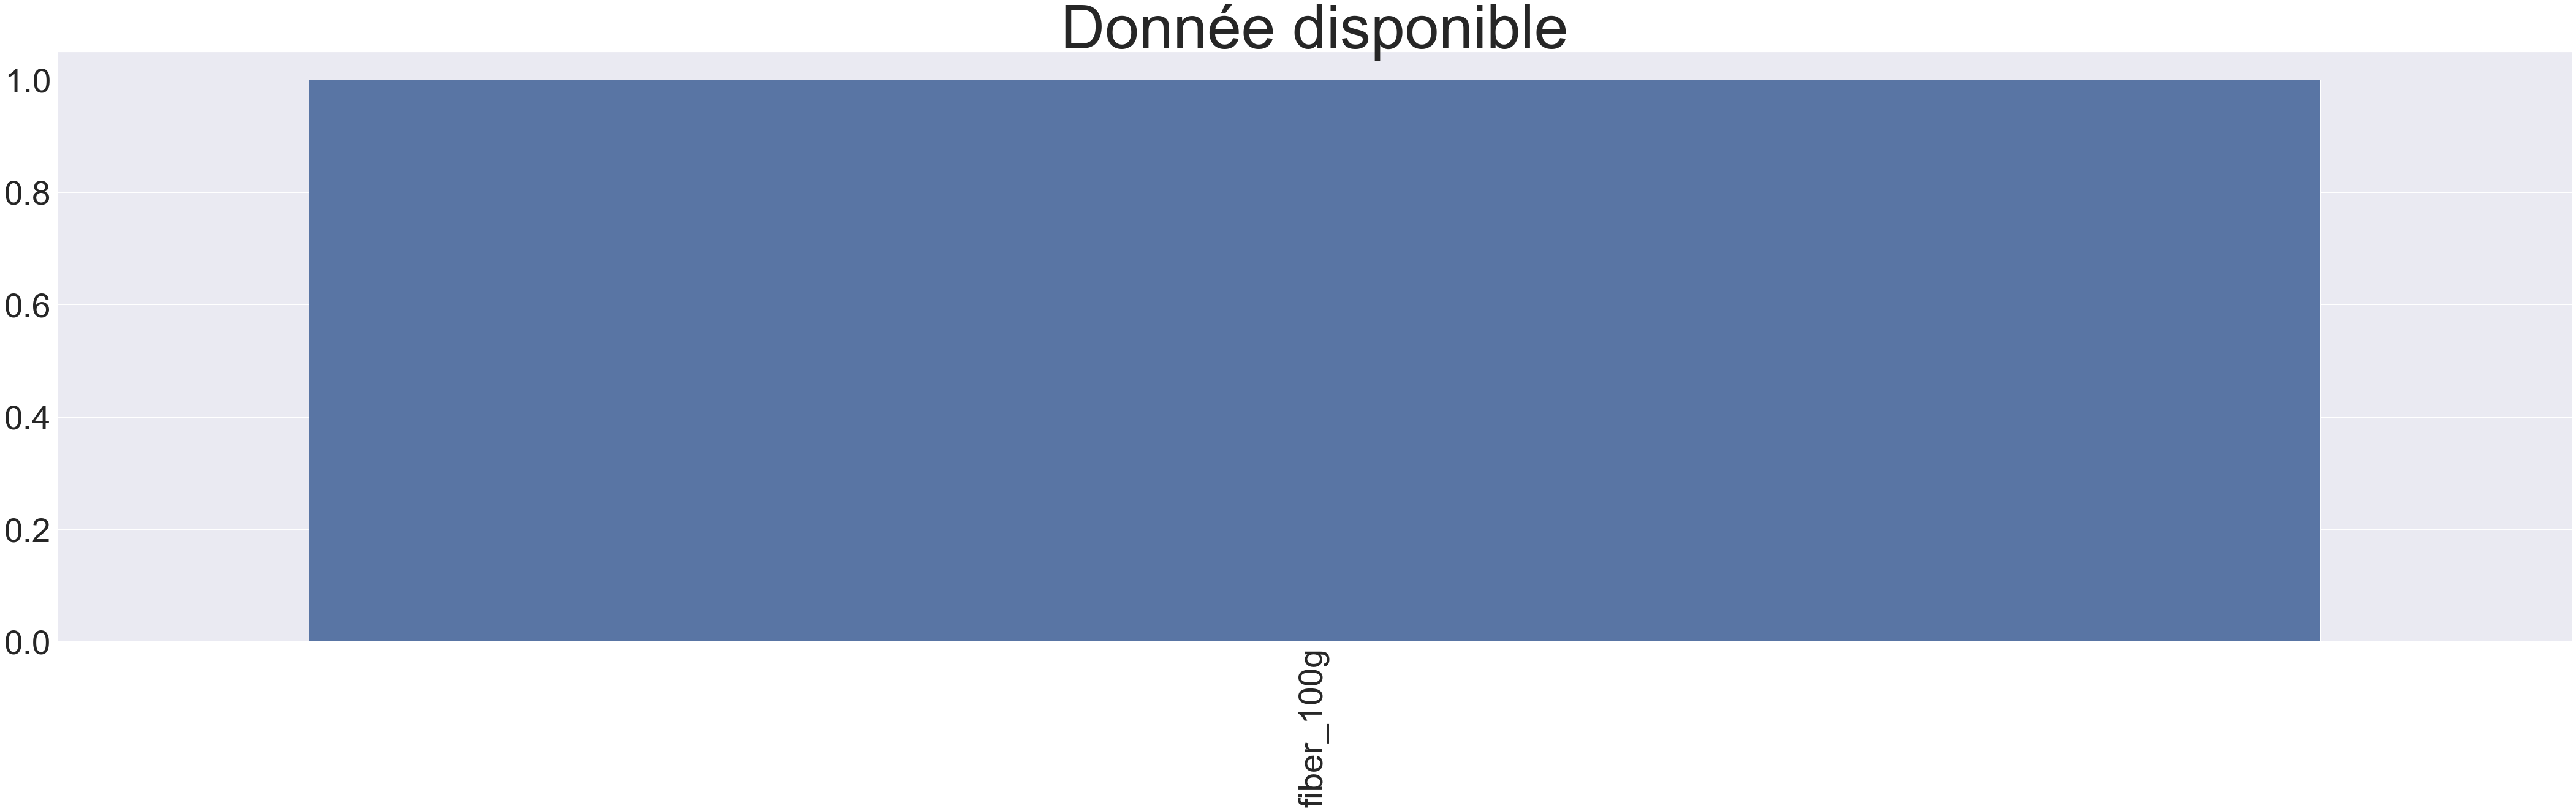

In [60]:
show_missing_data_graph(data_fill[['fiber_100g']])

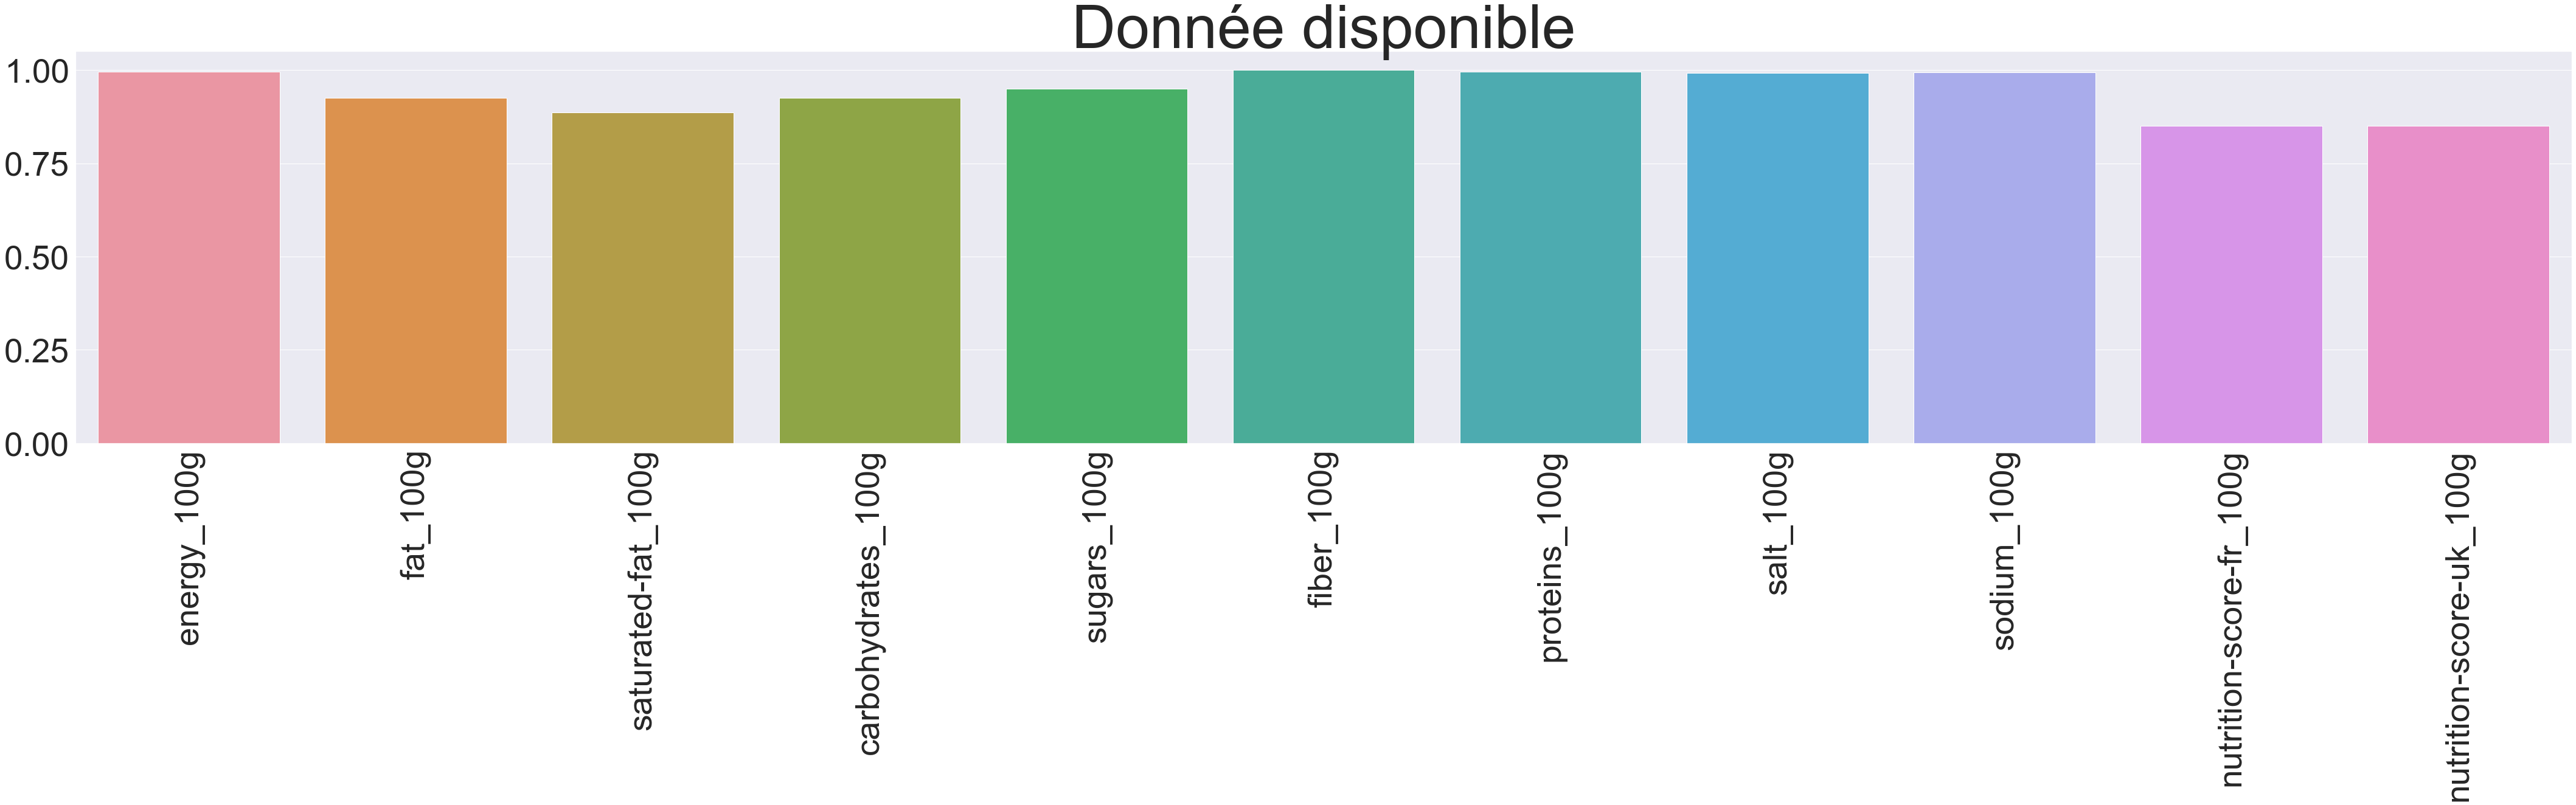

In [61]:
show_missing_data_graph(data_fill[liste_100_full])

In [62]:
colonne_to_imput = liste_100_full 

In [63]:
colonne_to_imput

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [64]:
# On va à présent remplir le reste des donnée de composition manquante avec un knn imputer

imputer_100 = KNNImputer()
imputer_100.fit(data_fill[colonne_to_imput])


KNNImputer()

In [65]:
data_fill[colonne_to_imput] = imputer_100.transform(data_fill[colonne_to_imput])

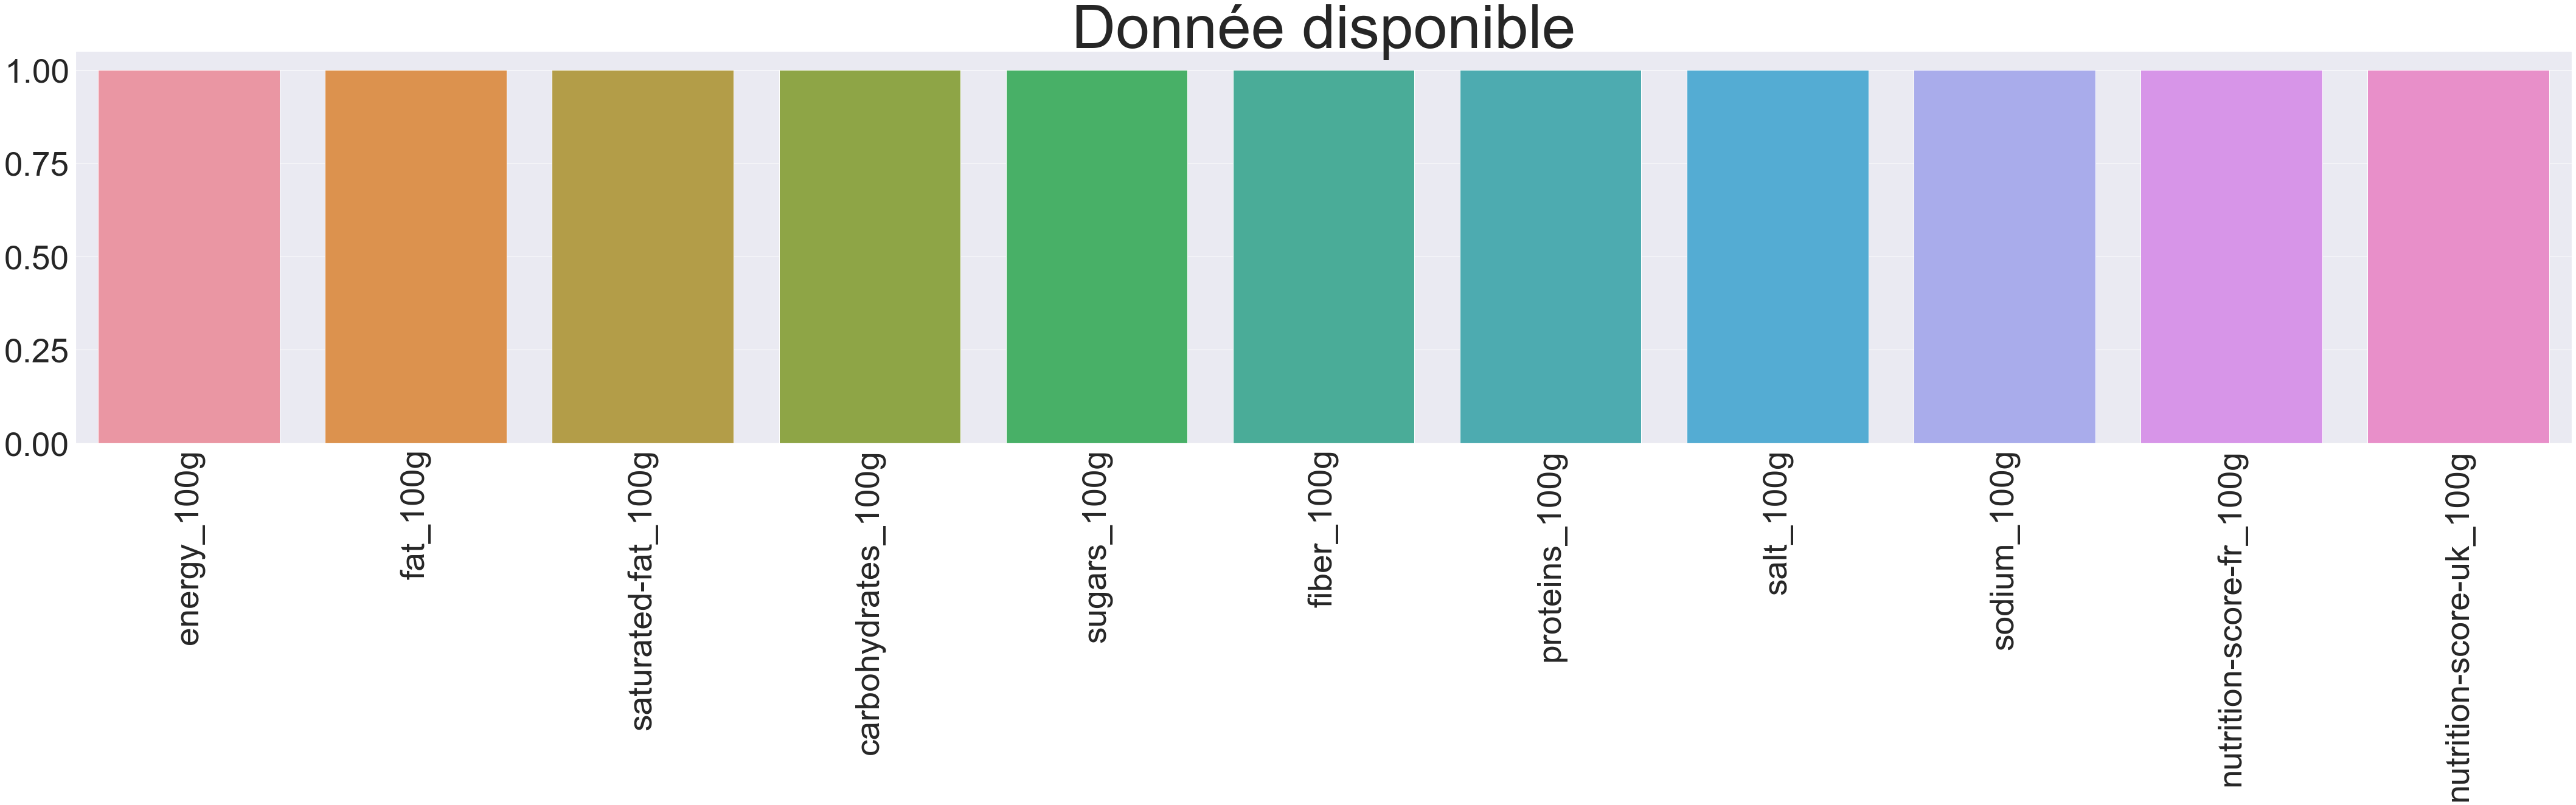

In [66]:
show_missing_data_graph(data_fill[liste_100_full])

In [67]:
data_fit = data_fill.dropna(subset=['nutrition_grade_fr'],inplace=False).copy()
data_to_fill = data_fill[data_fill['nutrition_grade_fr'].isnull()].copy()

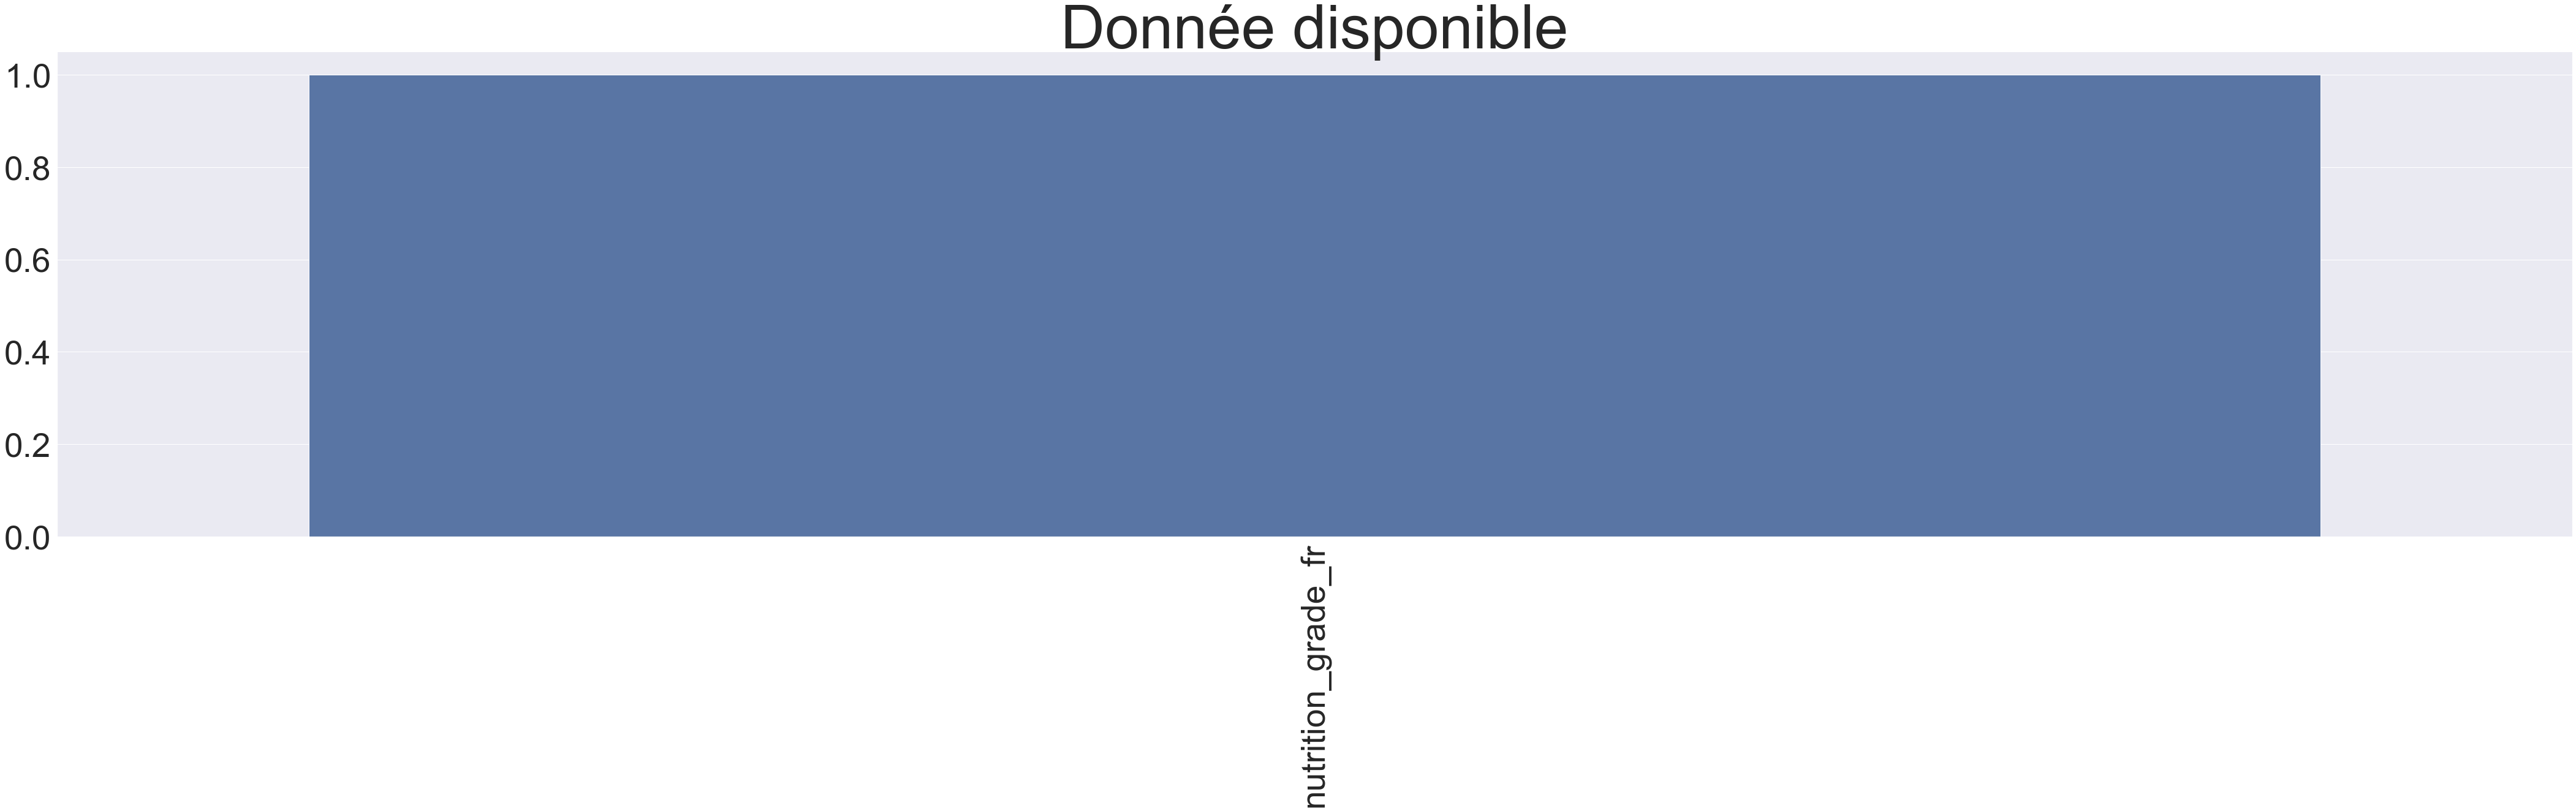

In [68]:
# On vérifie que l'on a bien un dataset avec les nutrious grade et un dataset sans

show_missing_data_graph(data_fit[['nutrition_grade_fr']])

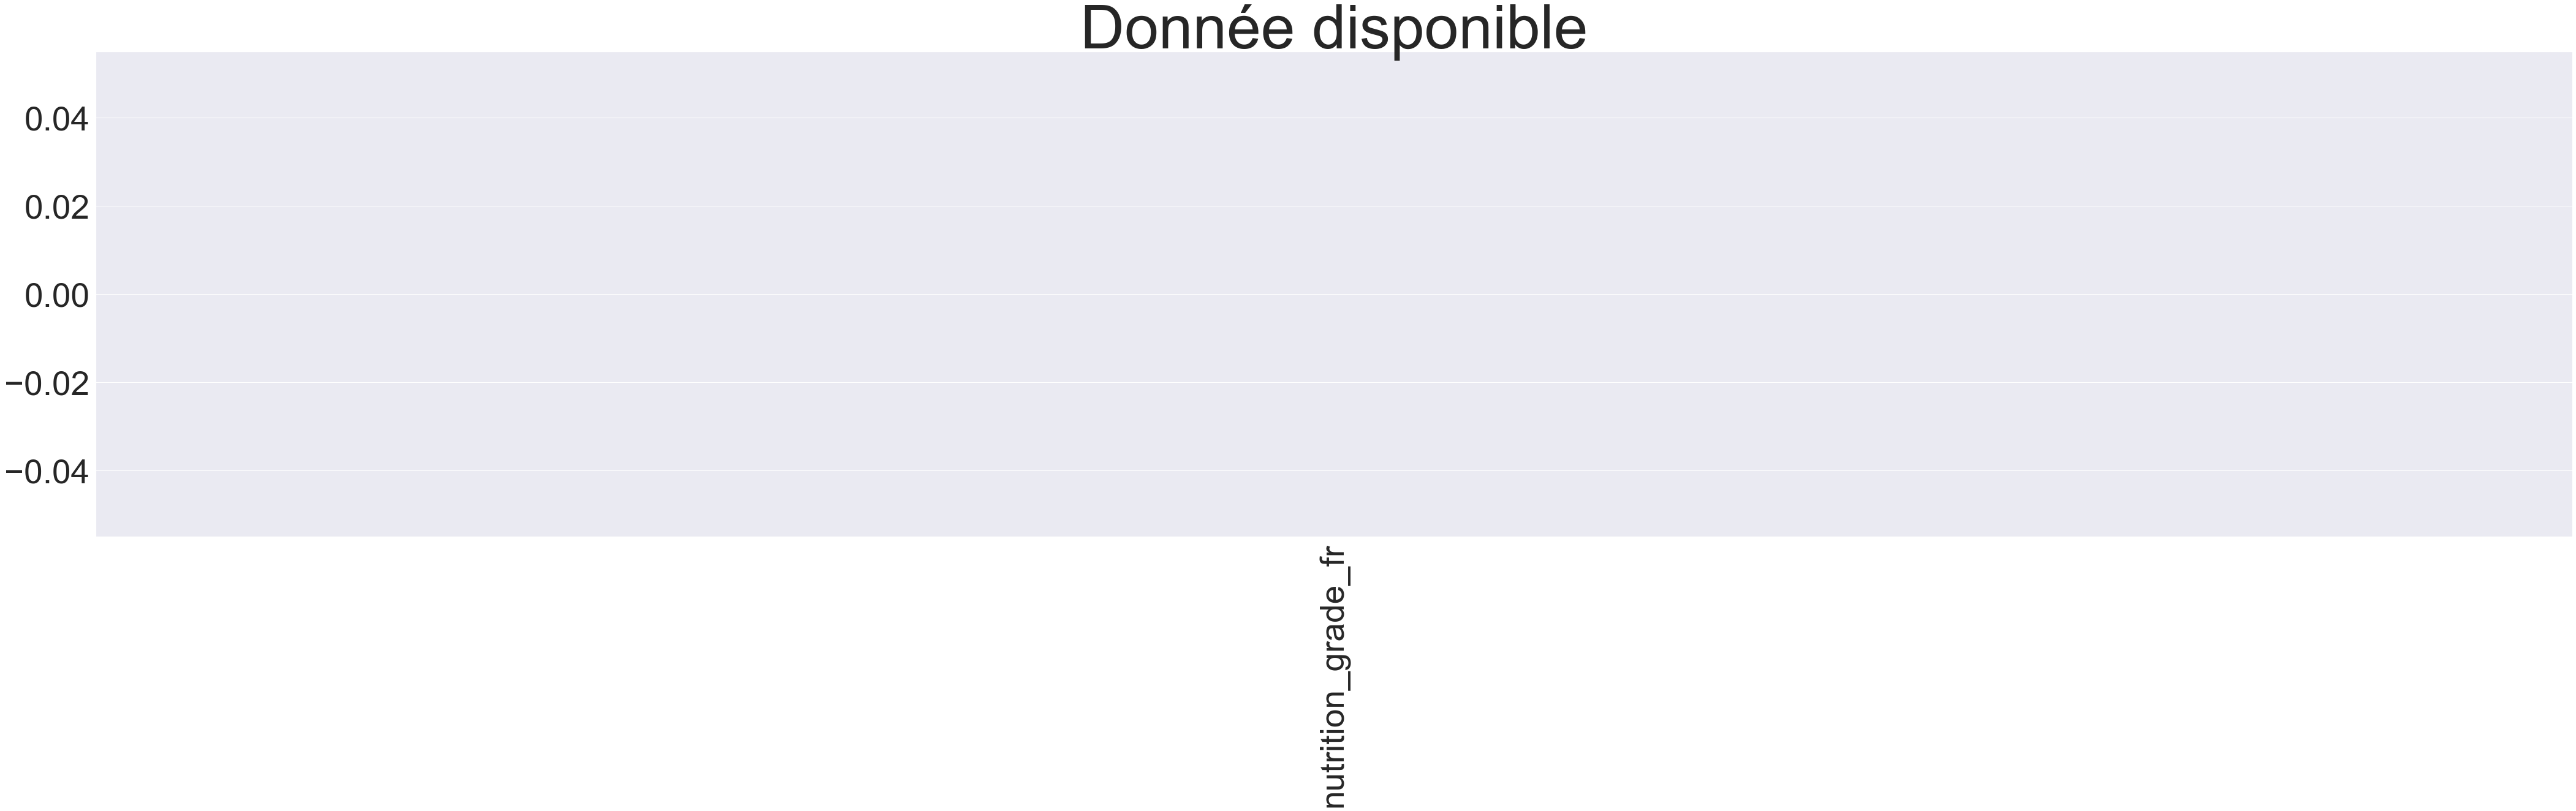

In [69]:
show_missing_data_graph(data_to_fill[['nutrition_grade_fr']])

In [70]:
# On fait un train test split

X = data_fit[liste_100_full]
y = data_fit['nutrition_grade_fr']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [71]:
# Premier KNNClassifier avec n_neighbour = 3

classifier_grade = KNeighborsClassifier(n_neighbors=3)
classifier_grade.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
classifier_grade.score(X_test,y_test)

0.8999635689209777

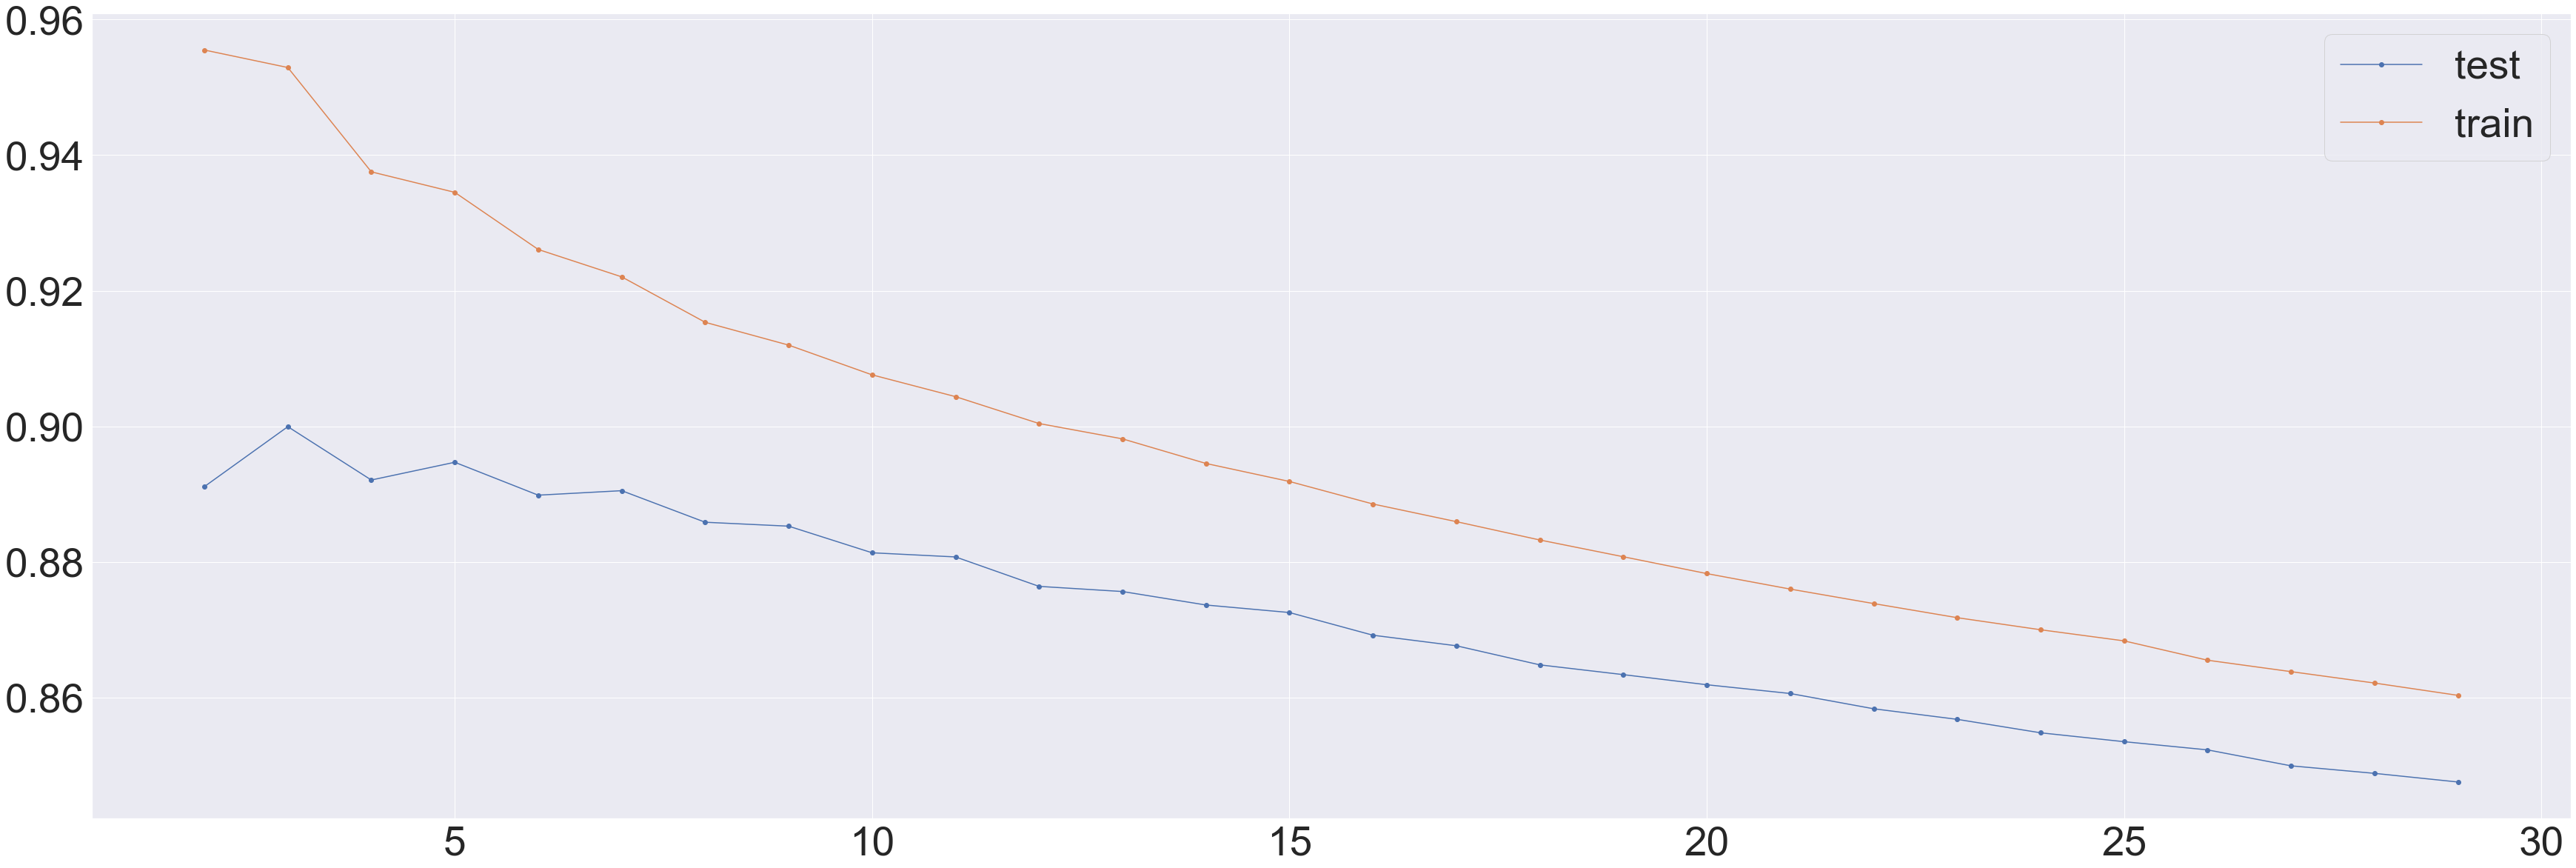

In [73]:
# On va chercher le meilleur score

scoring_test = []
scoring_train = []

for k in range(2,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    scoring_test.append(knn.fit(X_train, y_train).score(X_test, y_test))
    scoring_train.append(knn.fit(X_train, y_train).score(X_train, y_train))
plt.plot(range(2,30),scoring_test, 'o-',label="test")
plt.plot(range(2,30),scoring_train, 'o-',label="train")
plt.legend()
plt.show()

#On remarque que le n_neighbors =3 donne le meilleur score, mais il y a beaucoup d'overfit

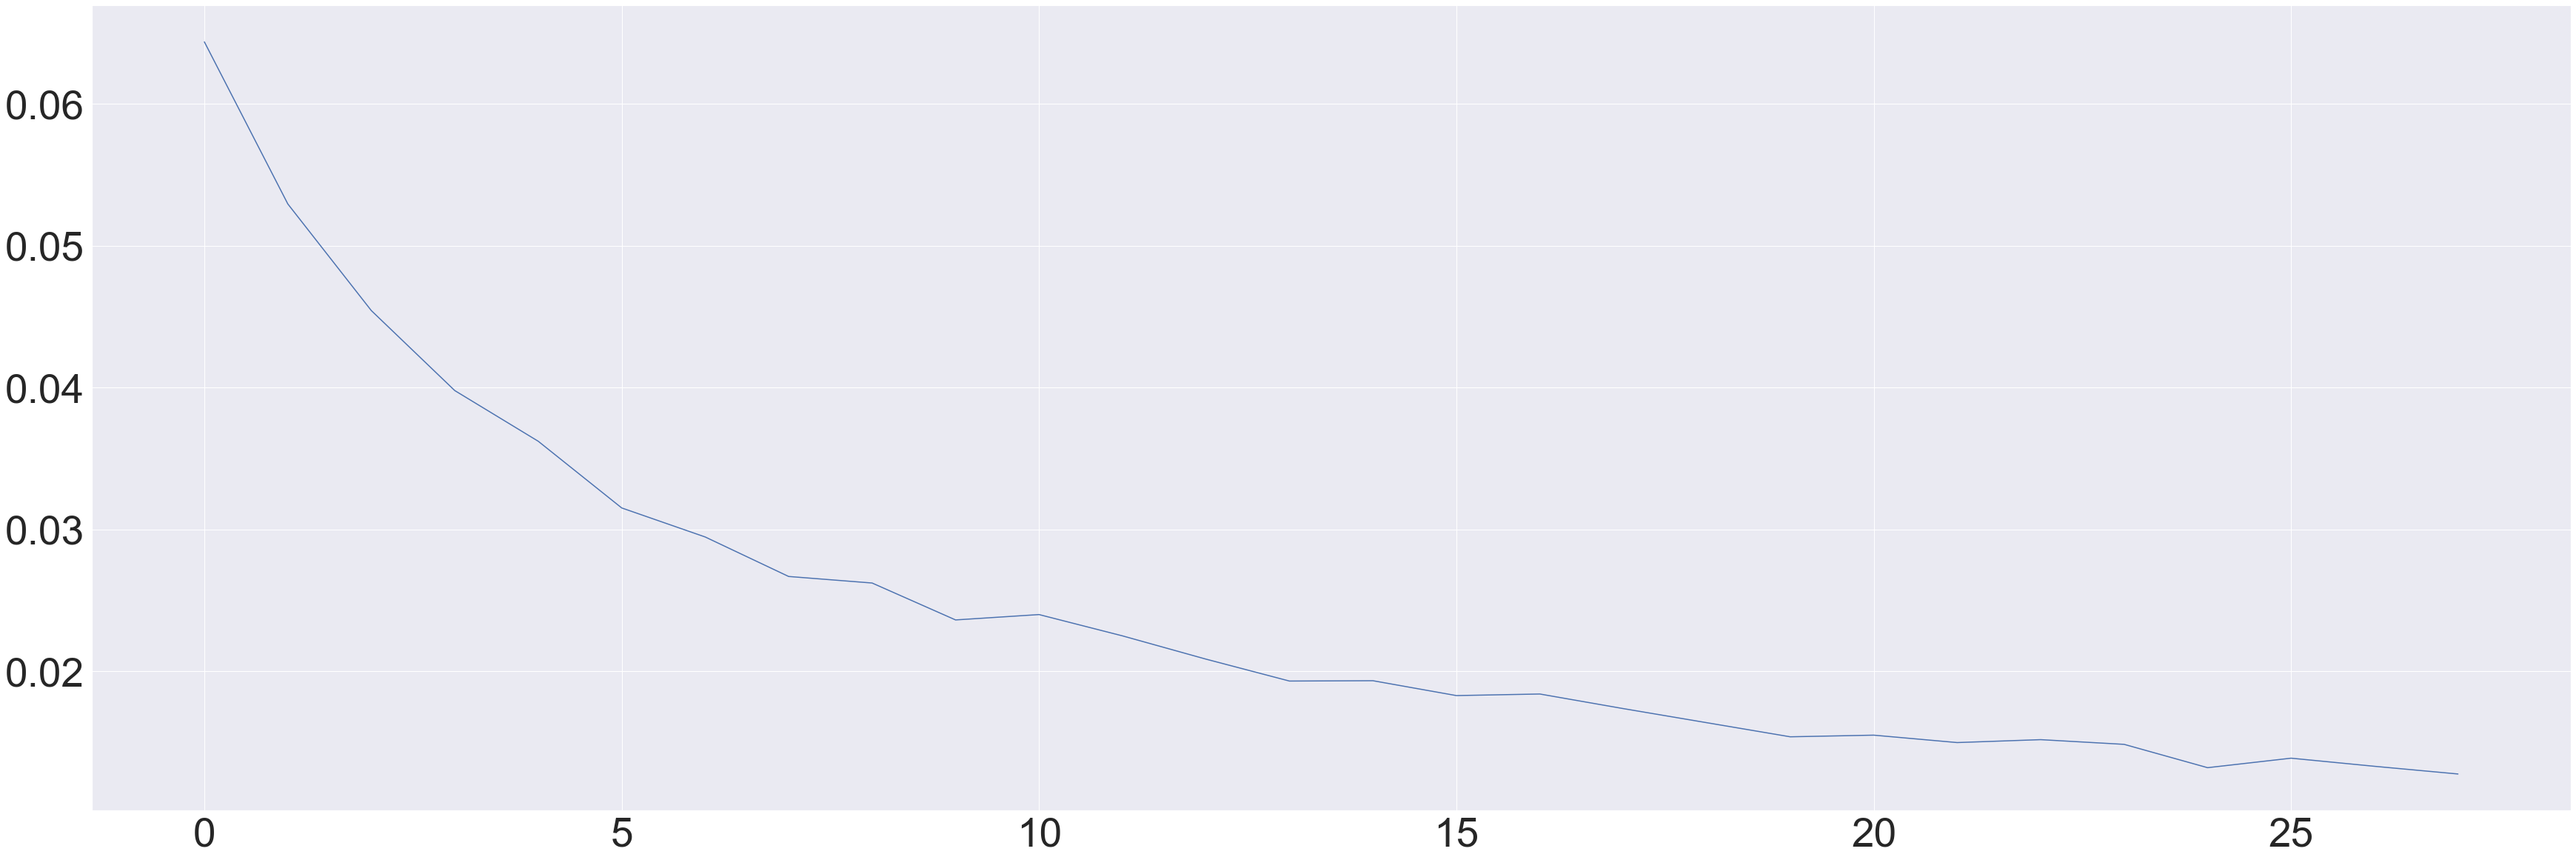

In [74]:
difference_train_test = np.subtract(scoring_train,scoring_test)

plt.plot(difference_train_test)

In [75]:
# Un bon classifier qui minimise l'overfititing serait n_neighbors=15

In [76]:
# On crée donc notre meilleur classifier

classifier_grade_best = KNeighborsClassifier(n_neighbors=15)
classifier_grade_best.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [77]:
# Et on finit en faisant notre prédiction

data_to_fill['nutrition_grade_fr'] = classifier_grade_best.predict(data_to_fill[liste_100_full ])

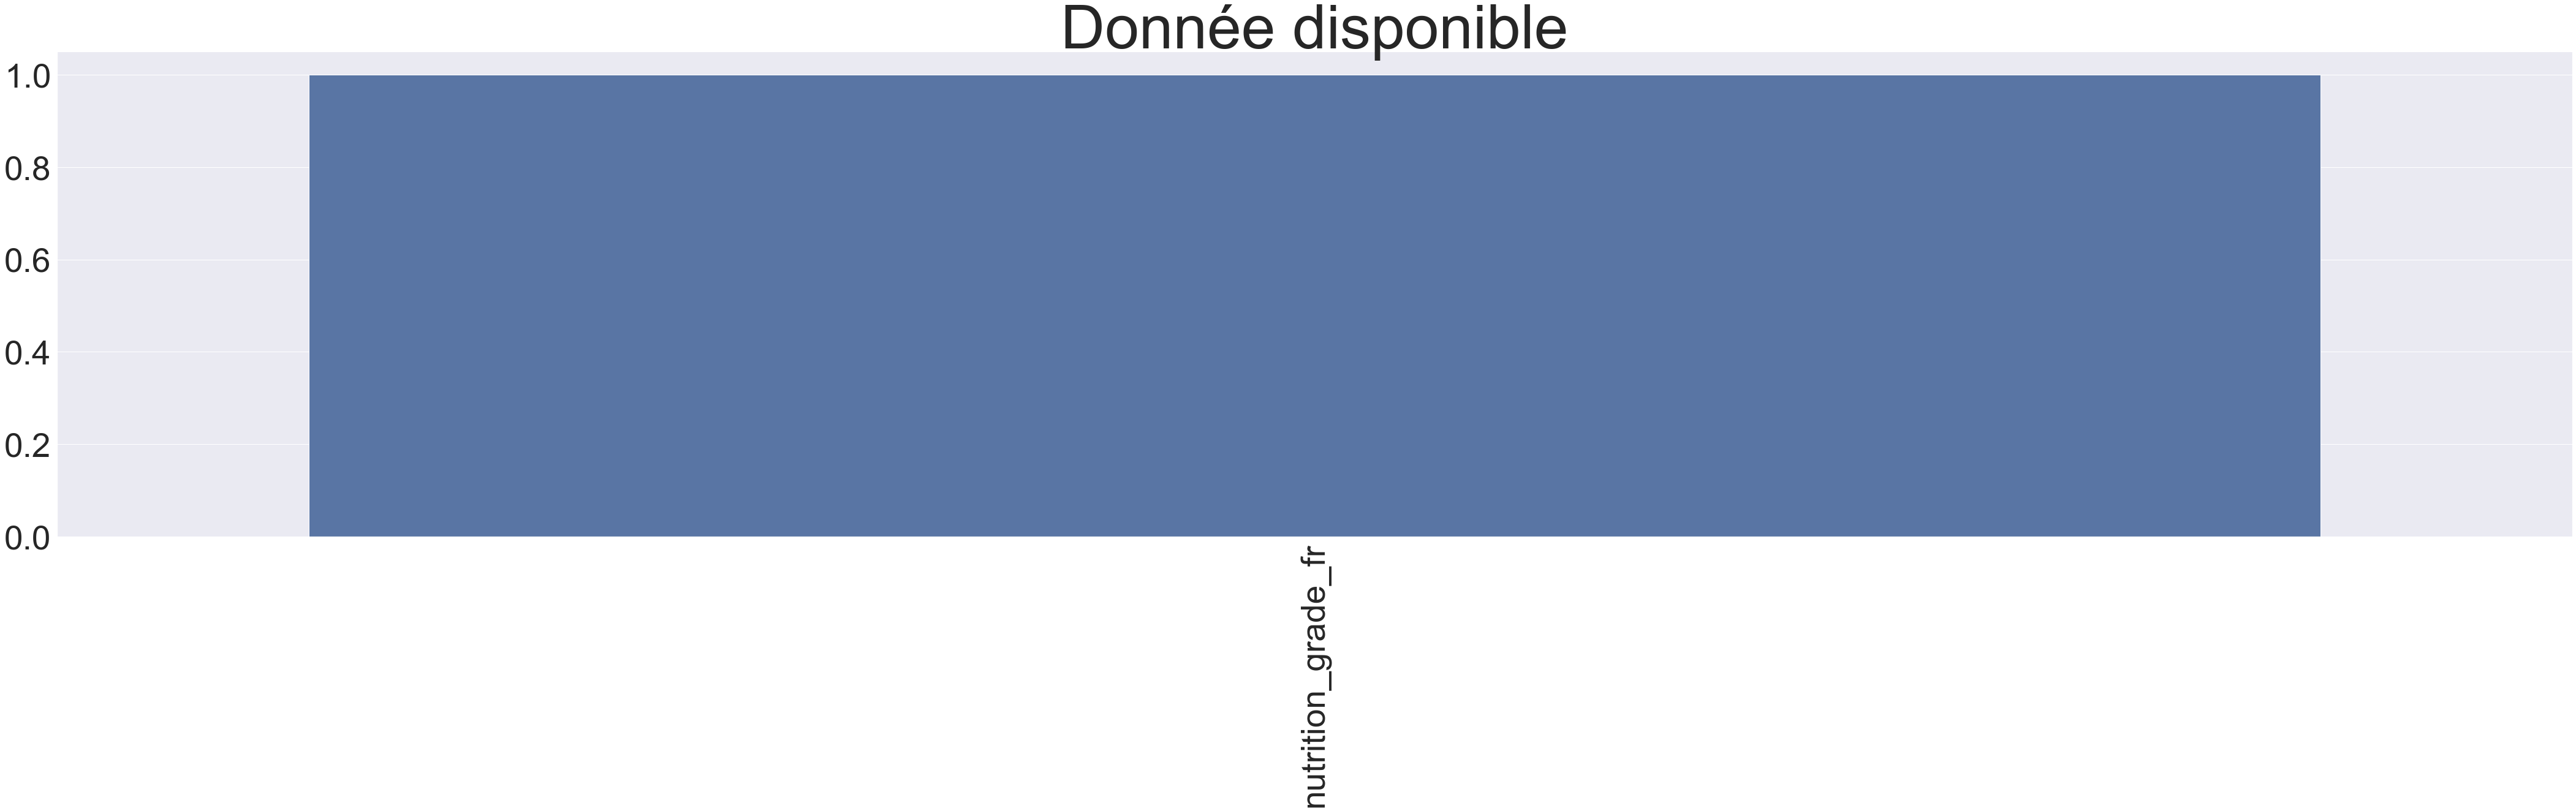

In [78]:
show_missing_data_graph(data_to_fill[['nutrition_grade_fr']])

In [79]:
data_final = pd.concat([data_to_fill,data_fit])

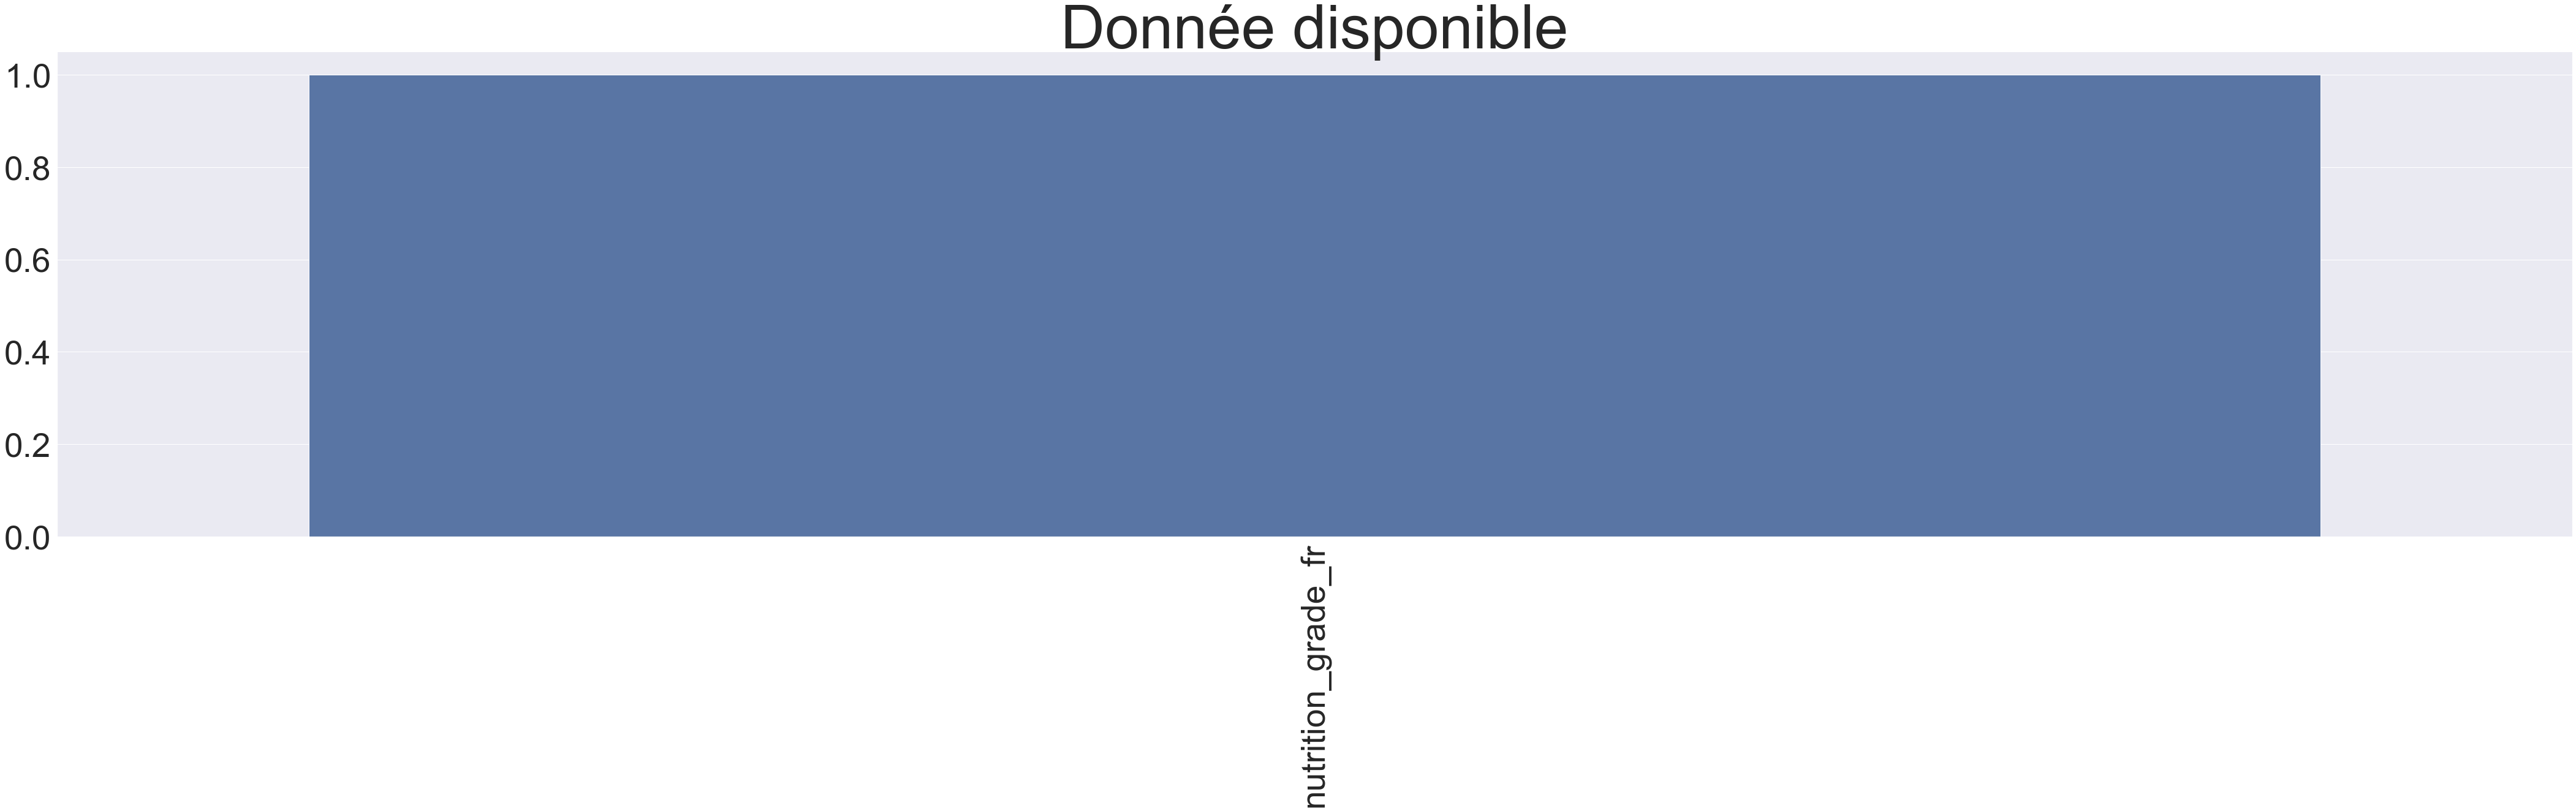

In [80]:
show_missing_data_graph(data_final[['nutrition_grade_fr']])

In [81]:
data_final.shape

(236494, 36)

In [82]:
data_fill.shape

(236494, 36)

In [83]:
data_final.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'sum_100g', 'donnée manquante'],
      dtype='object')

In [84]:
# On supprime 'sum_100g', 'donnée manquante' car on en a plus besoin

data_export = data_final.drop(['sum_100g', 'donnée manquante'],axis=1).copy()

In [85]:
data_export.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [86]:
data_export.to_csv('data_clean.csv',index=False)

In [87]:
data_export

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09 10:34:13,1489055653,2017-03-09 10:34:13,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,0.0,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1552.0,1.43,0.120,77.140,4.600,5.7,8.57,0.510000,0.200787,-1.8,-1.8
10,0000000016612,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09 10:35:31,1489055731,2017-03-09 10:35:31,Organic Adzuki Beans,Unfi,unfi,US,en:united-states,États-Unis,Organic adzuki beans,48 g (0.25 cup),0.0,[ organic-adzuki-beans -> en:organic-adzuki-b...,0.0,0.0,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1393.0,1.04,0.240,62.500,11.426,12.5,22.92,0.211000,0.082756,-1.8,-1.8
11,0000000016650,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055668,2017-03-09 10:34:28,1489055668,2017-03-09 10:34:28,Organic Penne Pasta,Gardentime,gardentime,US,en:united-states,États-Unis,Organic refined durum semolina wheat flour,57 g (0.5 cup),0.0,[ organic-refined-durum-semolina-wheat-flour ...,0.0,0.0,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1540.0,1.75,0.000,73.680,2.102,1.8,14.04,0.030988,0.012200,-3.4,-3.4
17,0000000018173,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055667,2017-03-09 10:34:27,1489055667,2017-03-09 10:34:27,Organic Sweetened Banana Chips,Unfi,unfi,US,en:united-states,États-Unis,"Organic bananas, organic coconut oil, organic ...",30 g (0.25 cup),0.0,[ organic-bananas -> en:organic-bananas ] [...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2092.0,26.67,23.330,66.670,16.670,3.3,3.33,0.000000,0.000000,15.0,15.0
18,0000000018197,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055652,2017-03-09 10:34:12,1489055652,2017-03-09 10:34:12,Lotus Organic Brown Jasmine Rice,Unfi,unfi,US,en:united-states,États-Unis,Organic brown jasmine rice,45 g (0.25 cup),0.0,[ organic-brown-jasmine-rice -> en:organic-br...,0.0,0.0,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1582.0,2.22,2.064,77.780,2.220,2.2,8.89,0.784000,0.308661,7.2,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320742,9787461062105,http://world-fr.openfoodfacts.org/produit/9787...,usda-ndb-import,1489092300,2017-03-09 20:45:00,1489092300,2017-03-09 20:45:00,Natural Cassava,Industria De Casabe Paul,industria-de-casabe-paul,US,en:united-states,États-Unis,Cassava.,85 g (85 GRM),0.0,[ cassava -> en:cassava ],0.0,0.0,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1477.0,0.00,0.000,87.060,2.350,4.7,1.18,0.030480,0.012000,-1.0,-1.0
320751,9847548283004,http://world-fr.openfoodfacts.org/produit/9847...,drmalabar,14

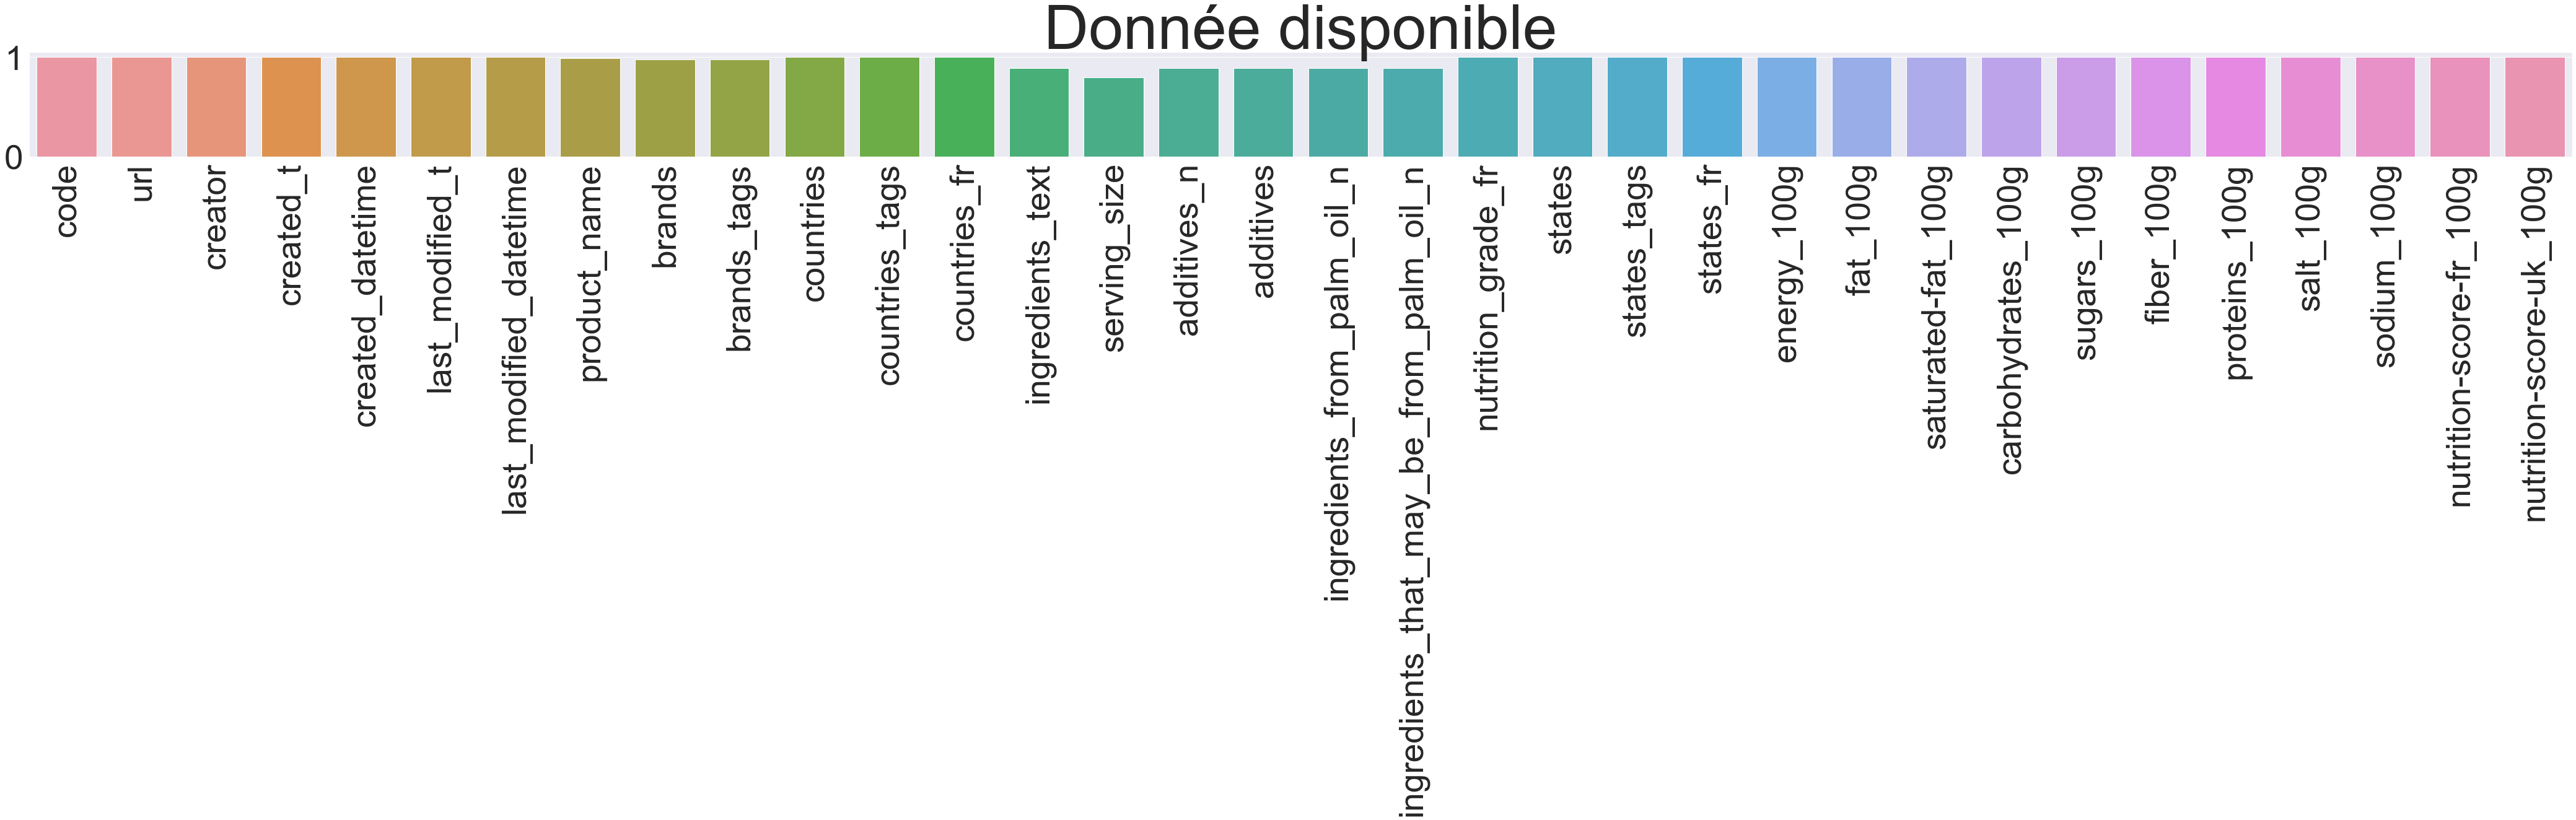

In [88]:
show_missing_data_graph(data_export)